## **Yolov9 Model Training on Custom Dataset**

Download link: https://universe.roboflow.com/kidney-627pn/kidney-detection/dataset/1

### Mount our Colab with Google drive


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### GPU Check


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = "/content/drive/MyDrive/YOLOV"
print(HOME)

/content/drive/MyDrive/YOLOV


In [ ]:
%cd /content/drive/MyDrive/YOLOV

/content/drive/MyDrive/YOLOV


#### Clone and install


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git


Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 5.11 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [ ]:
%cd yolov9
!pip install -r requirements.txt -q

/content/drive/MyDrive/YOLOV/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.0 MB/s eta 0:00:00


## Download model weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402426
-rw------- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw------- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw------- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw------- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data image data

In [ ]:
#!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
#SOURCE_IMAGE_PATH = f"{HOME}/Stone-1-_jpg.rf.a010f77c7f193e208a0b317c049a356f.jpg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/Stone.jpg --device cpu

detect: weights=['/content/drive/MyDrive/YOLOV/weights/gelan-c.pt'], source=/content/drive/MyDrive/YOLOV/Stone.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/drive/MyDrive/YOLOV/Stone.jpg: 640x640 1 bowl, 1 dining table, 1 clock, 1563.1ms
Speed: 3.3ms pre-process, 1563.1ms inference, 21.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


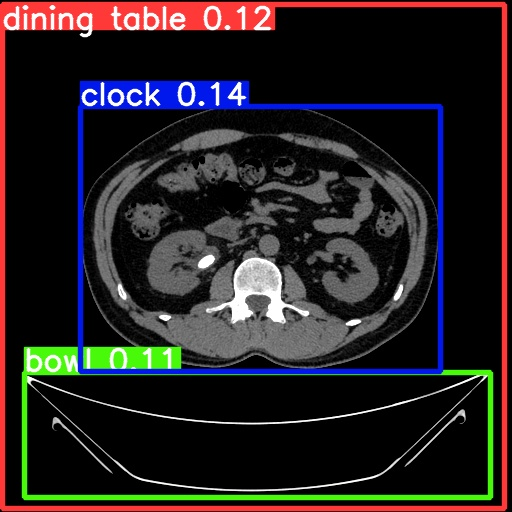

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/Stone.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/Stone.jpg --device cpu

detect: weights=['/content/drive/MyDrive/YOLOV/weights/yolov9-e.pt'], source=/content/drive/MyDrive/YOLOV/Stone.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/drive/MyDrive/YOLOV/Stone.jpg: 640x640 1 bird, 4815.4ms
Speed: 3.0ms pre-process, 4815.4ms inference, 7.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


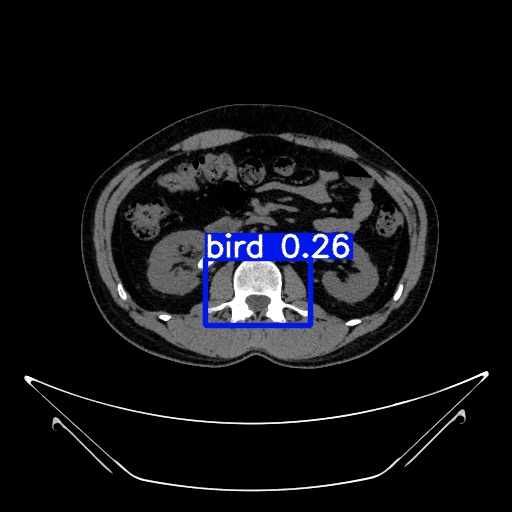

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/Stone.jpg", width=600)

In [ ]:
%cd {HOME}

/content/drive/MyDrive/YOLOV


## Train Custom Model

In [ ]:
#!cp -r '/content/drive/MyDrive/YOLOV/dataset' '/content/'

In [ ]:
#%cd {HOME}/yolov9
%cd {HOME}
"""
!python yolov9/train.py \
--batch 16 --epochs 25 --img 417 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/dataset/data.yaml \
--weights /content/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml
"""
!python yolov9/train.py \
--batch 64 --epochs 200 --img 417 --device cpu --min-items 0 --close-mosaic 15 \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml



/content/drive/MyDrive/YOLOV
2024-06-06 12:08:22.602058: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-06-06 12:08:22.602317: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-06-06 12:08:22.654408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train: weights=/content/drive/MyDrive/YOLOV/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, hyp=yolov9/data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=64, imgsz=417, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=

In [ ]:
!python yolov9/train.py \
--resume {HOME}/yolov9/runs/train/exp/weights/last.pt \
--batch 64 --epochs 200 --img 417 --device cpu \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml


2024-06-09 05:54:23.545091: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-06-09 05:54:23.545337: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-06-09 05:54:23.597193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train: weights=/content/drive/MyDrive/YOLOV/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, hyp=yolov9/data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=64, imgsz=417, rect=False, resume=/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, nop

In [ ]:
!python yolov9/train.py \
--resume {HOME}/yolov9/runs/train/exp/weights/last.pt \
--batch 64 --epochs 200 --img 417 --device cpu \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml

2024-06-11 04:26:12.731739: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-06-11 04:26:12.731986: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-06-11 04:26:12.789664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train: weights=/content/drive/MyDrive/YOLOV/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, hyp=yolov9/data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=64, imgsz=417, rect=False, resume=/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, nop

In [ ]:
!python yolov9/train.py \
--resume {HOME}/yolov9/runs/train/exp/weights/last.pt \
--batch 64 --epochs 200 --img 417 --device cpu \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml

2024-06-13 05:15:06.453036: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-06-13 05:15:06.453268: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-06-13 05:15:06.503818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train: weights=/content/drive/MyDrive/YOLOV/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, hyp=yolov9/data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=64, imgsz=417, rect=False, resume=/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, nop

In [ ]:
!python yolov9/train.py \
--resume {HOME}/yolov9/runs/train/exp/weights/last.pt \
--batch 64 --epochs 200 --img 417 --device cpu \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml

2024-06-14 10:20:54.481227: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-06-14 10:20:54.481464: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-06-14 10:20:54.540320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train: weights=/content/drive/MyDrive/YOLOV/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, hyp=yolov9/data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=64, imgsz=417, rect=False, resume=/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, nop

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    labels_correlogram.jpg
events.out.tfevents.1717675711.0c37c2498072.1526.0  labels.jpg
events.out.tfevents.1717907484.9e5e6399544f.2129.0  opt.yaml
events.out.tfevents.1717912471.a534f667186d.4861.0  P_curve.png
events.out.tfevents.1718079990.eb5eca5a498c.3895.0  PR_curve.png
events.out.tfevents.1718176169.1bad2656e70d.1758.0  R_curve.png
events.out.tfevents.1718255717.7da987fb7e0f.2010.0  results.csv
events.out.tfevents.1718360465.24906690b9fc.5807.0  results.png
F1_curve.png					    weights
hyp.yaml


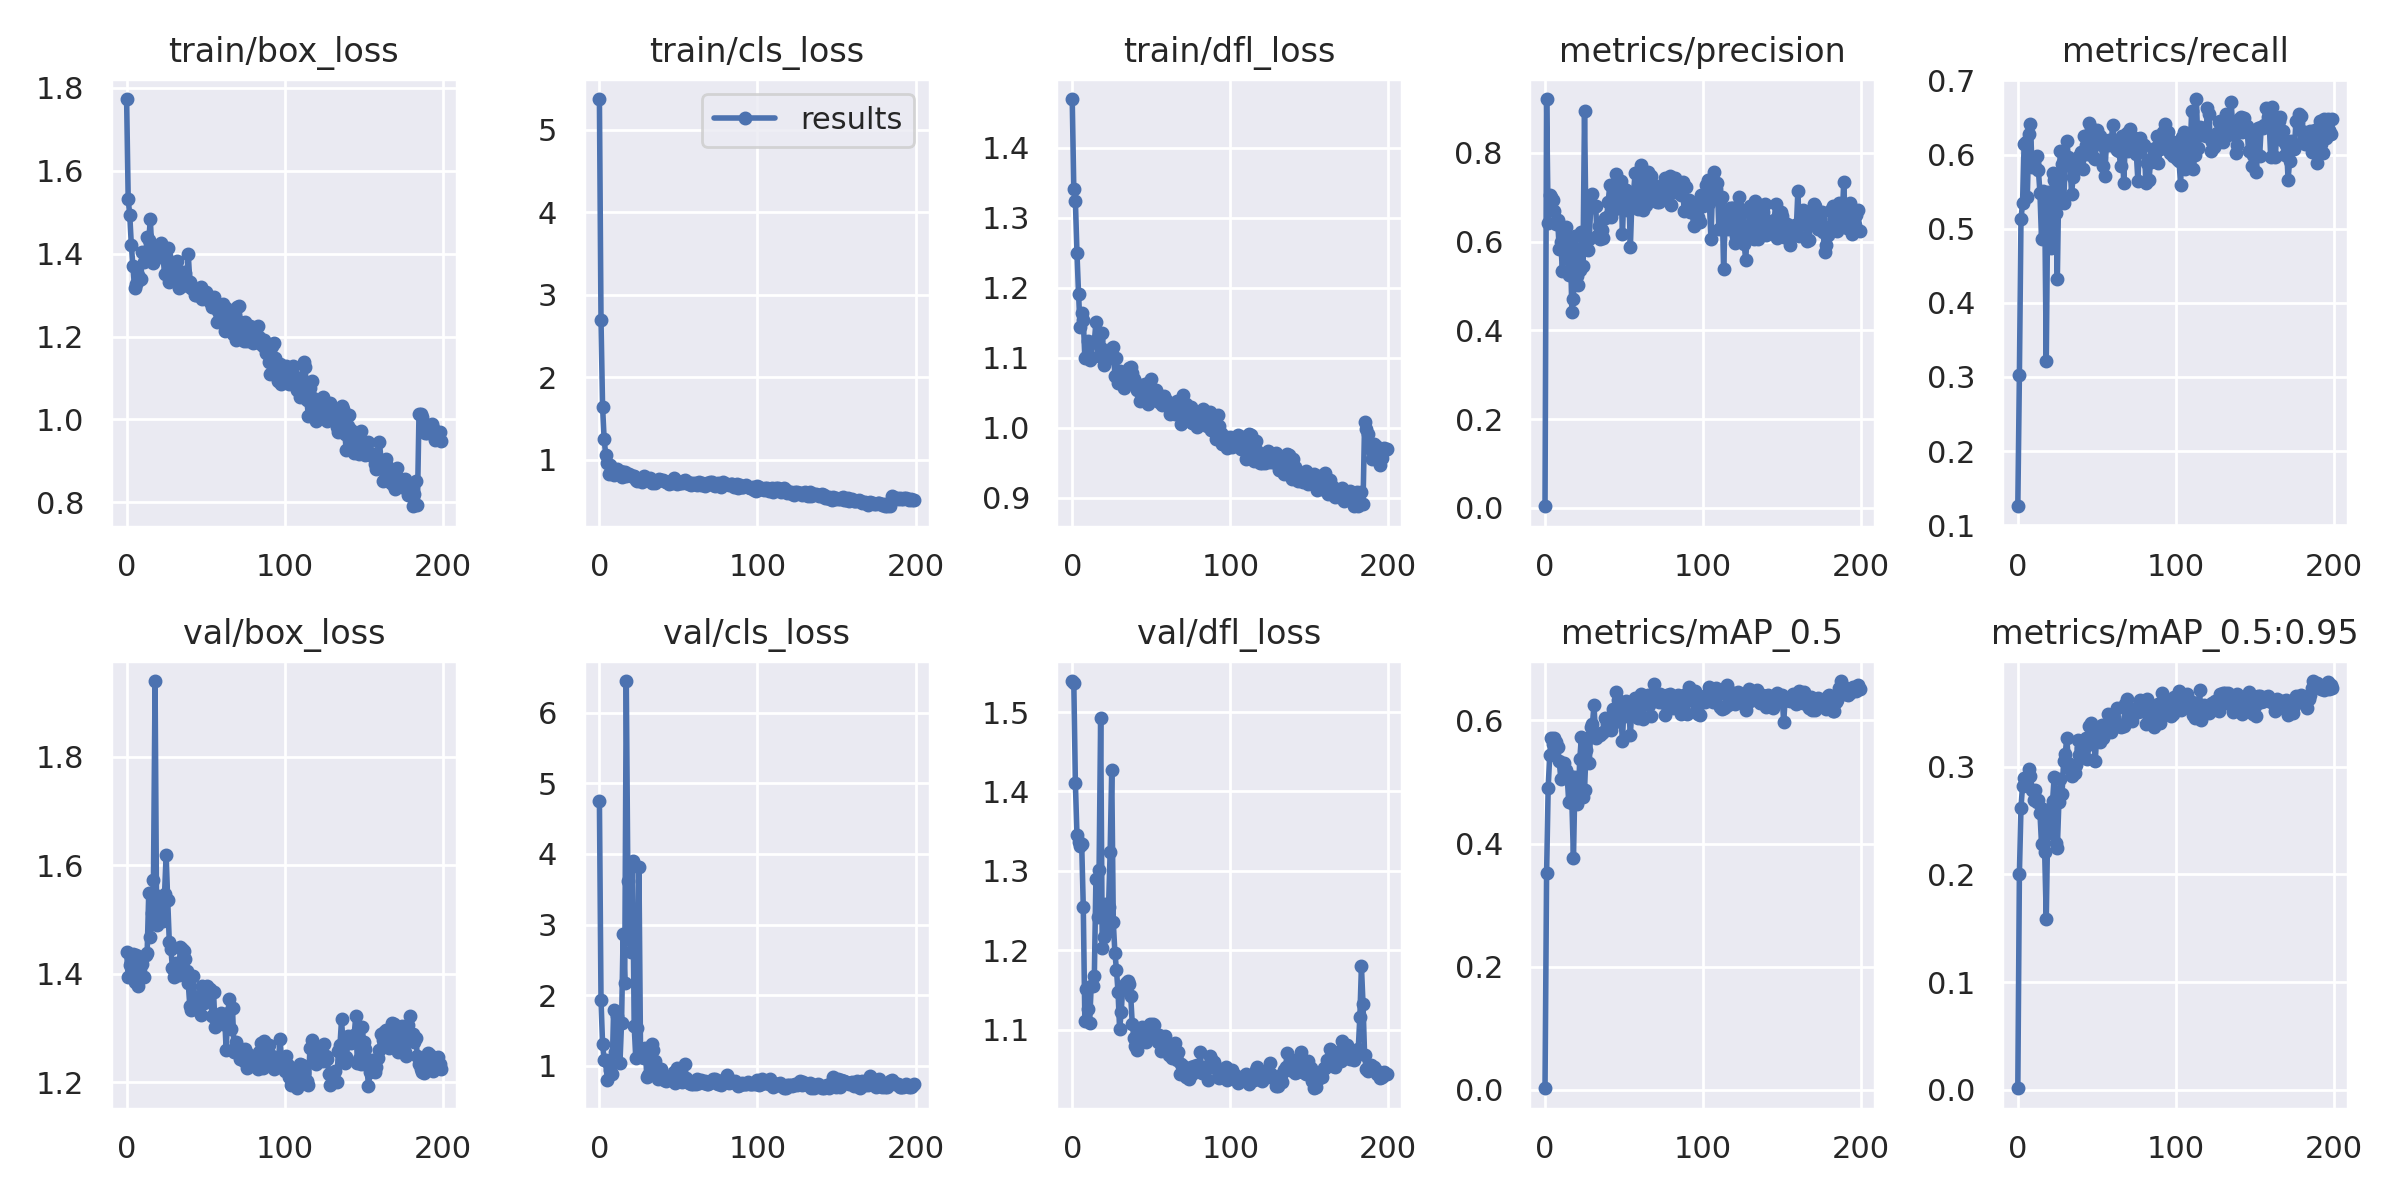

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

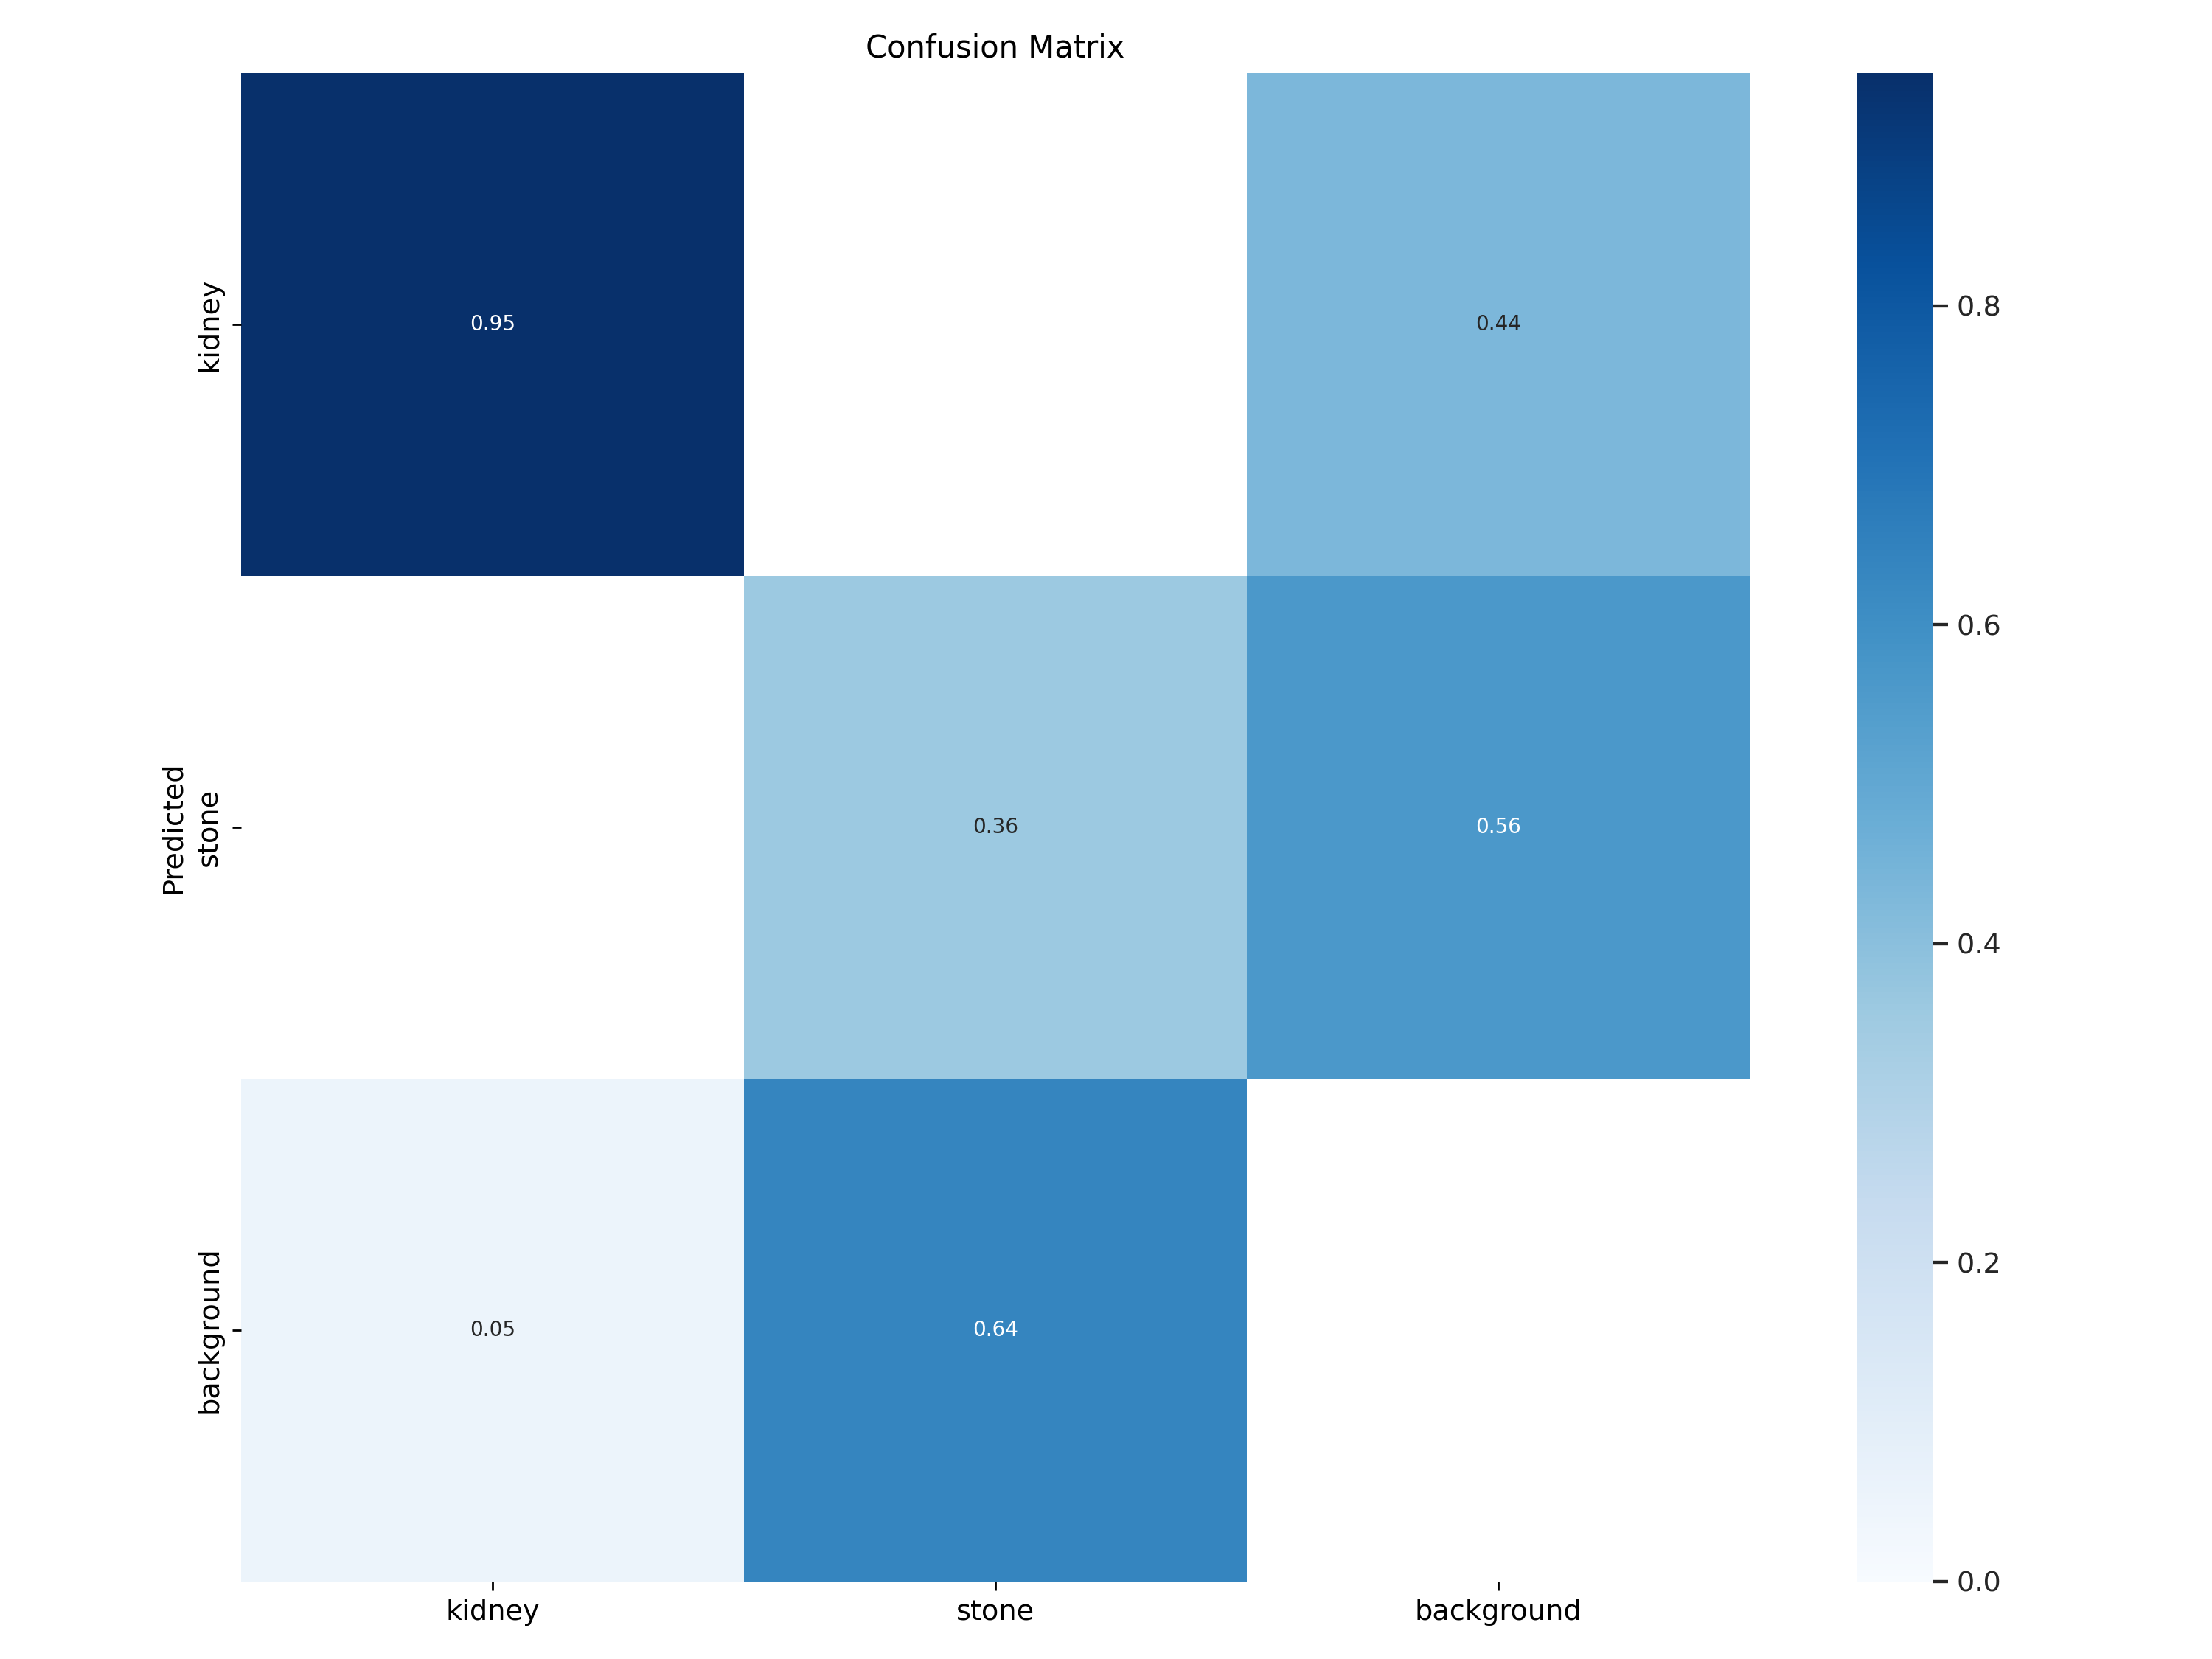

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

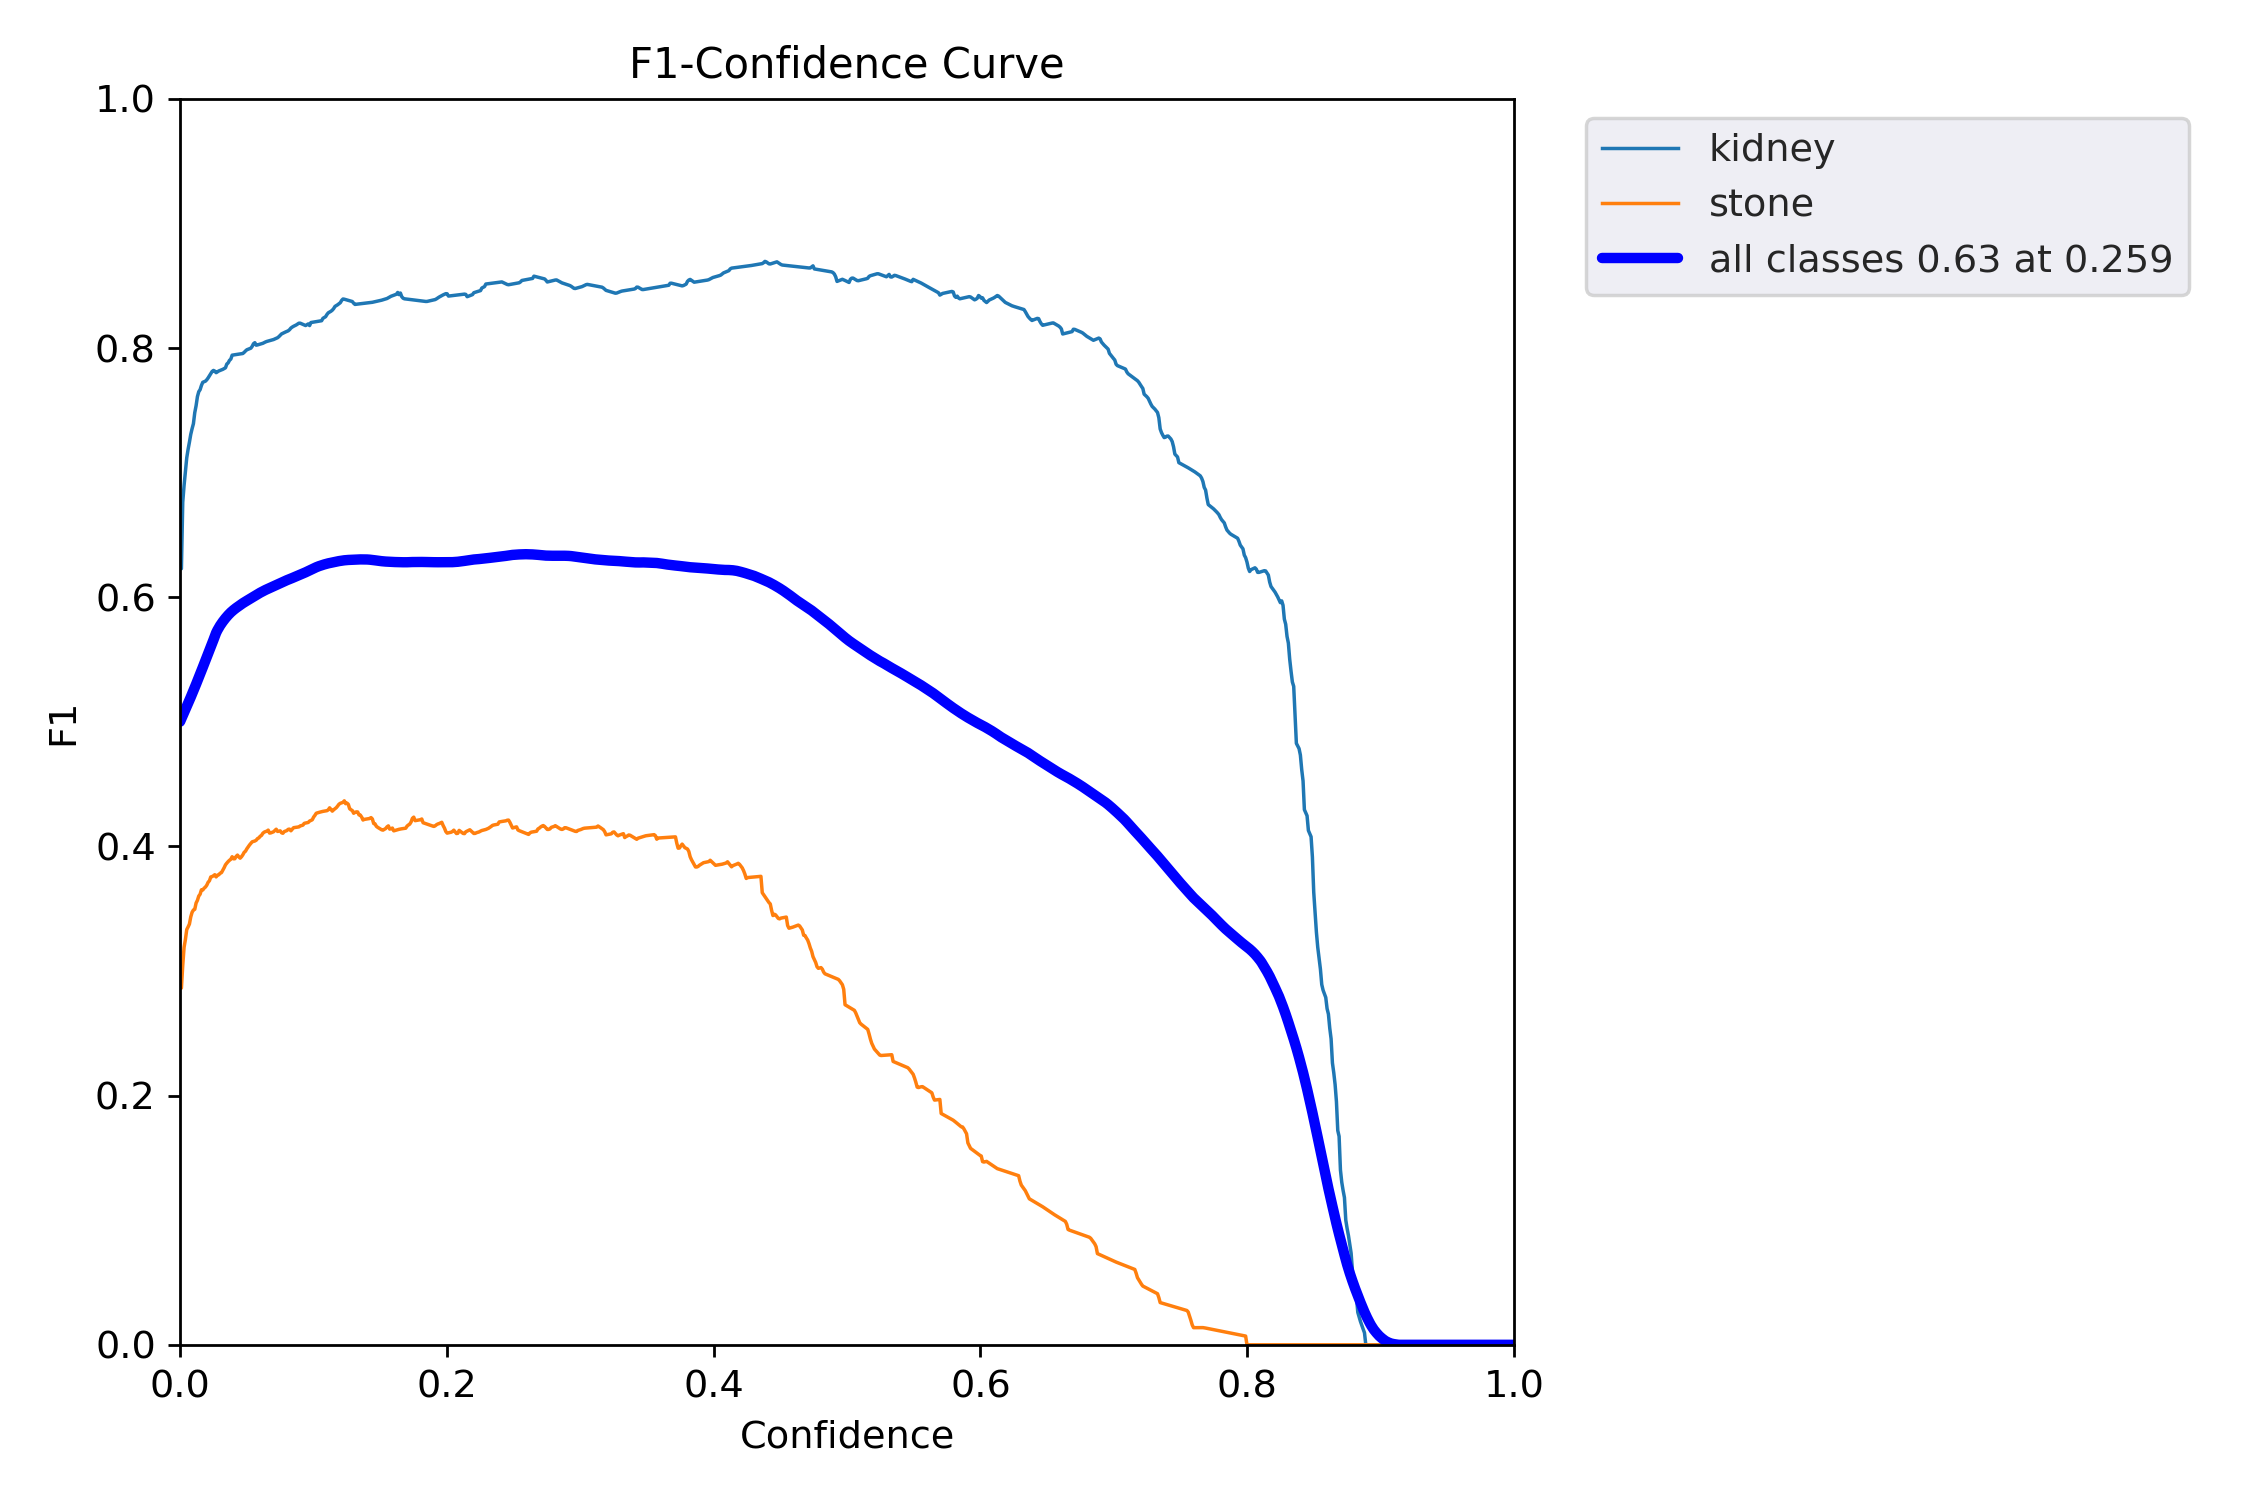

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/F1_curve.png", width=1000)

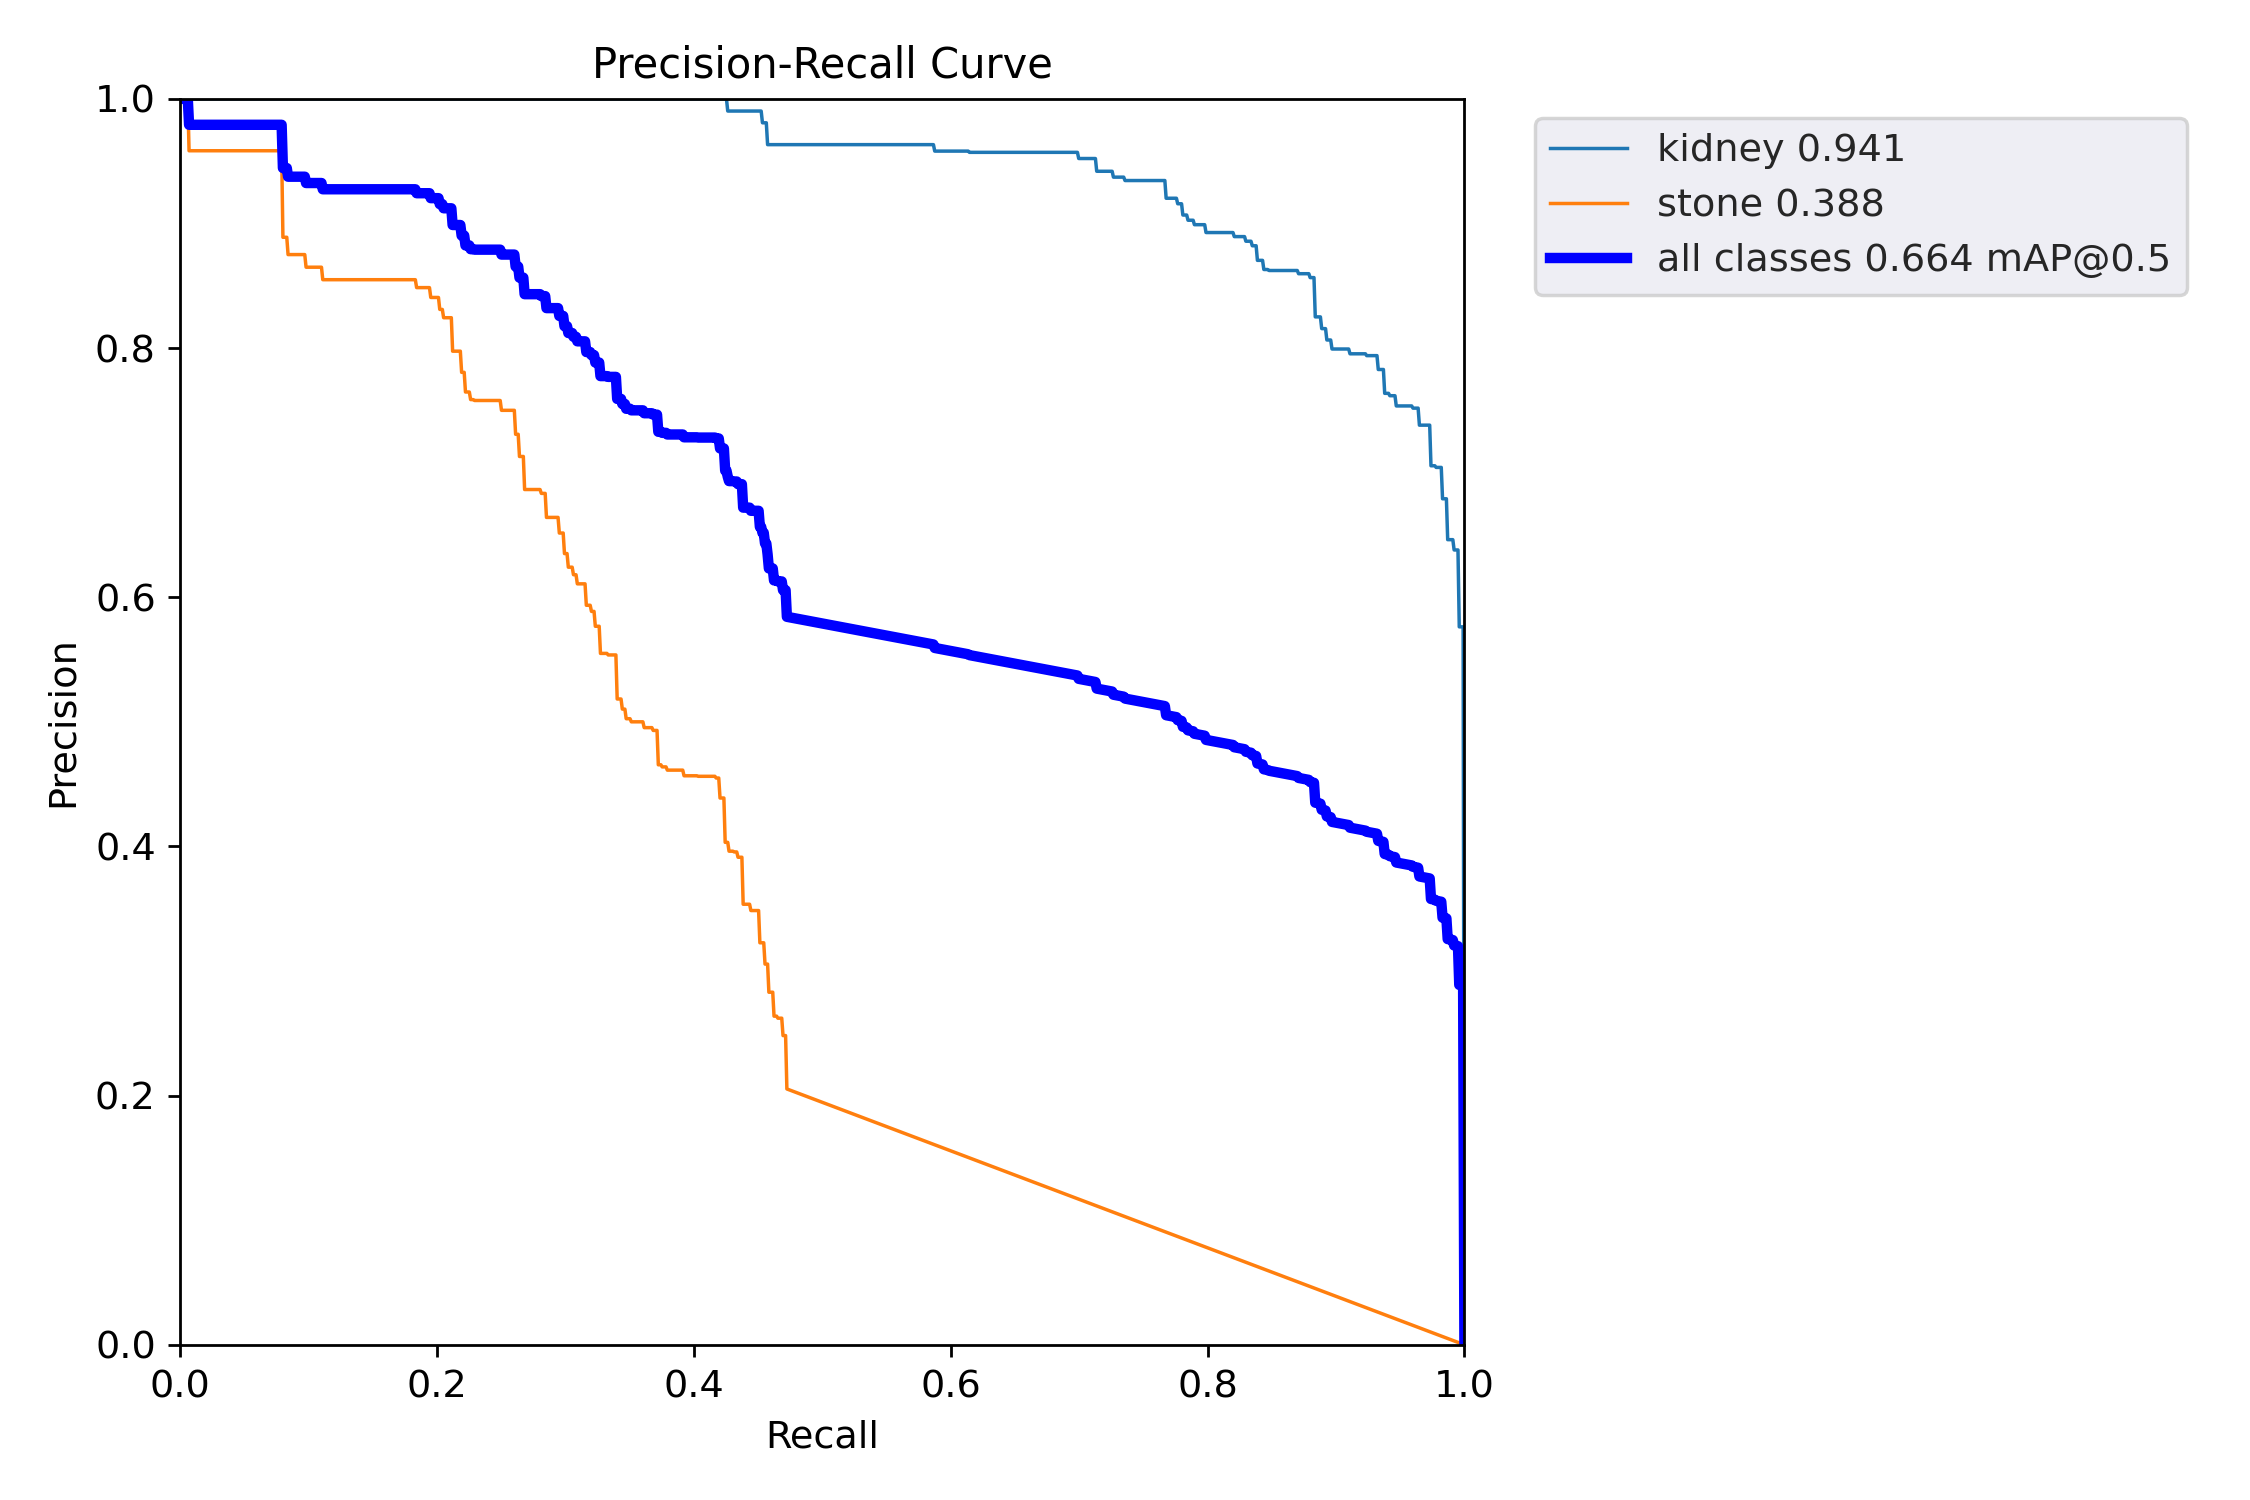

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/PR_curve.png", width=1000)

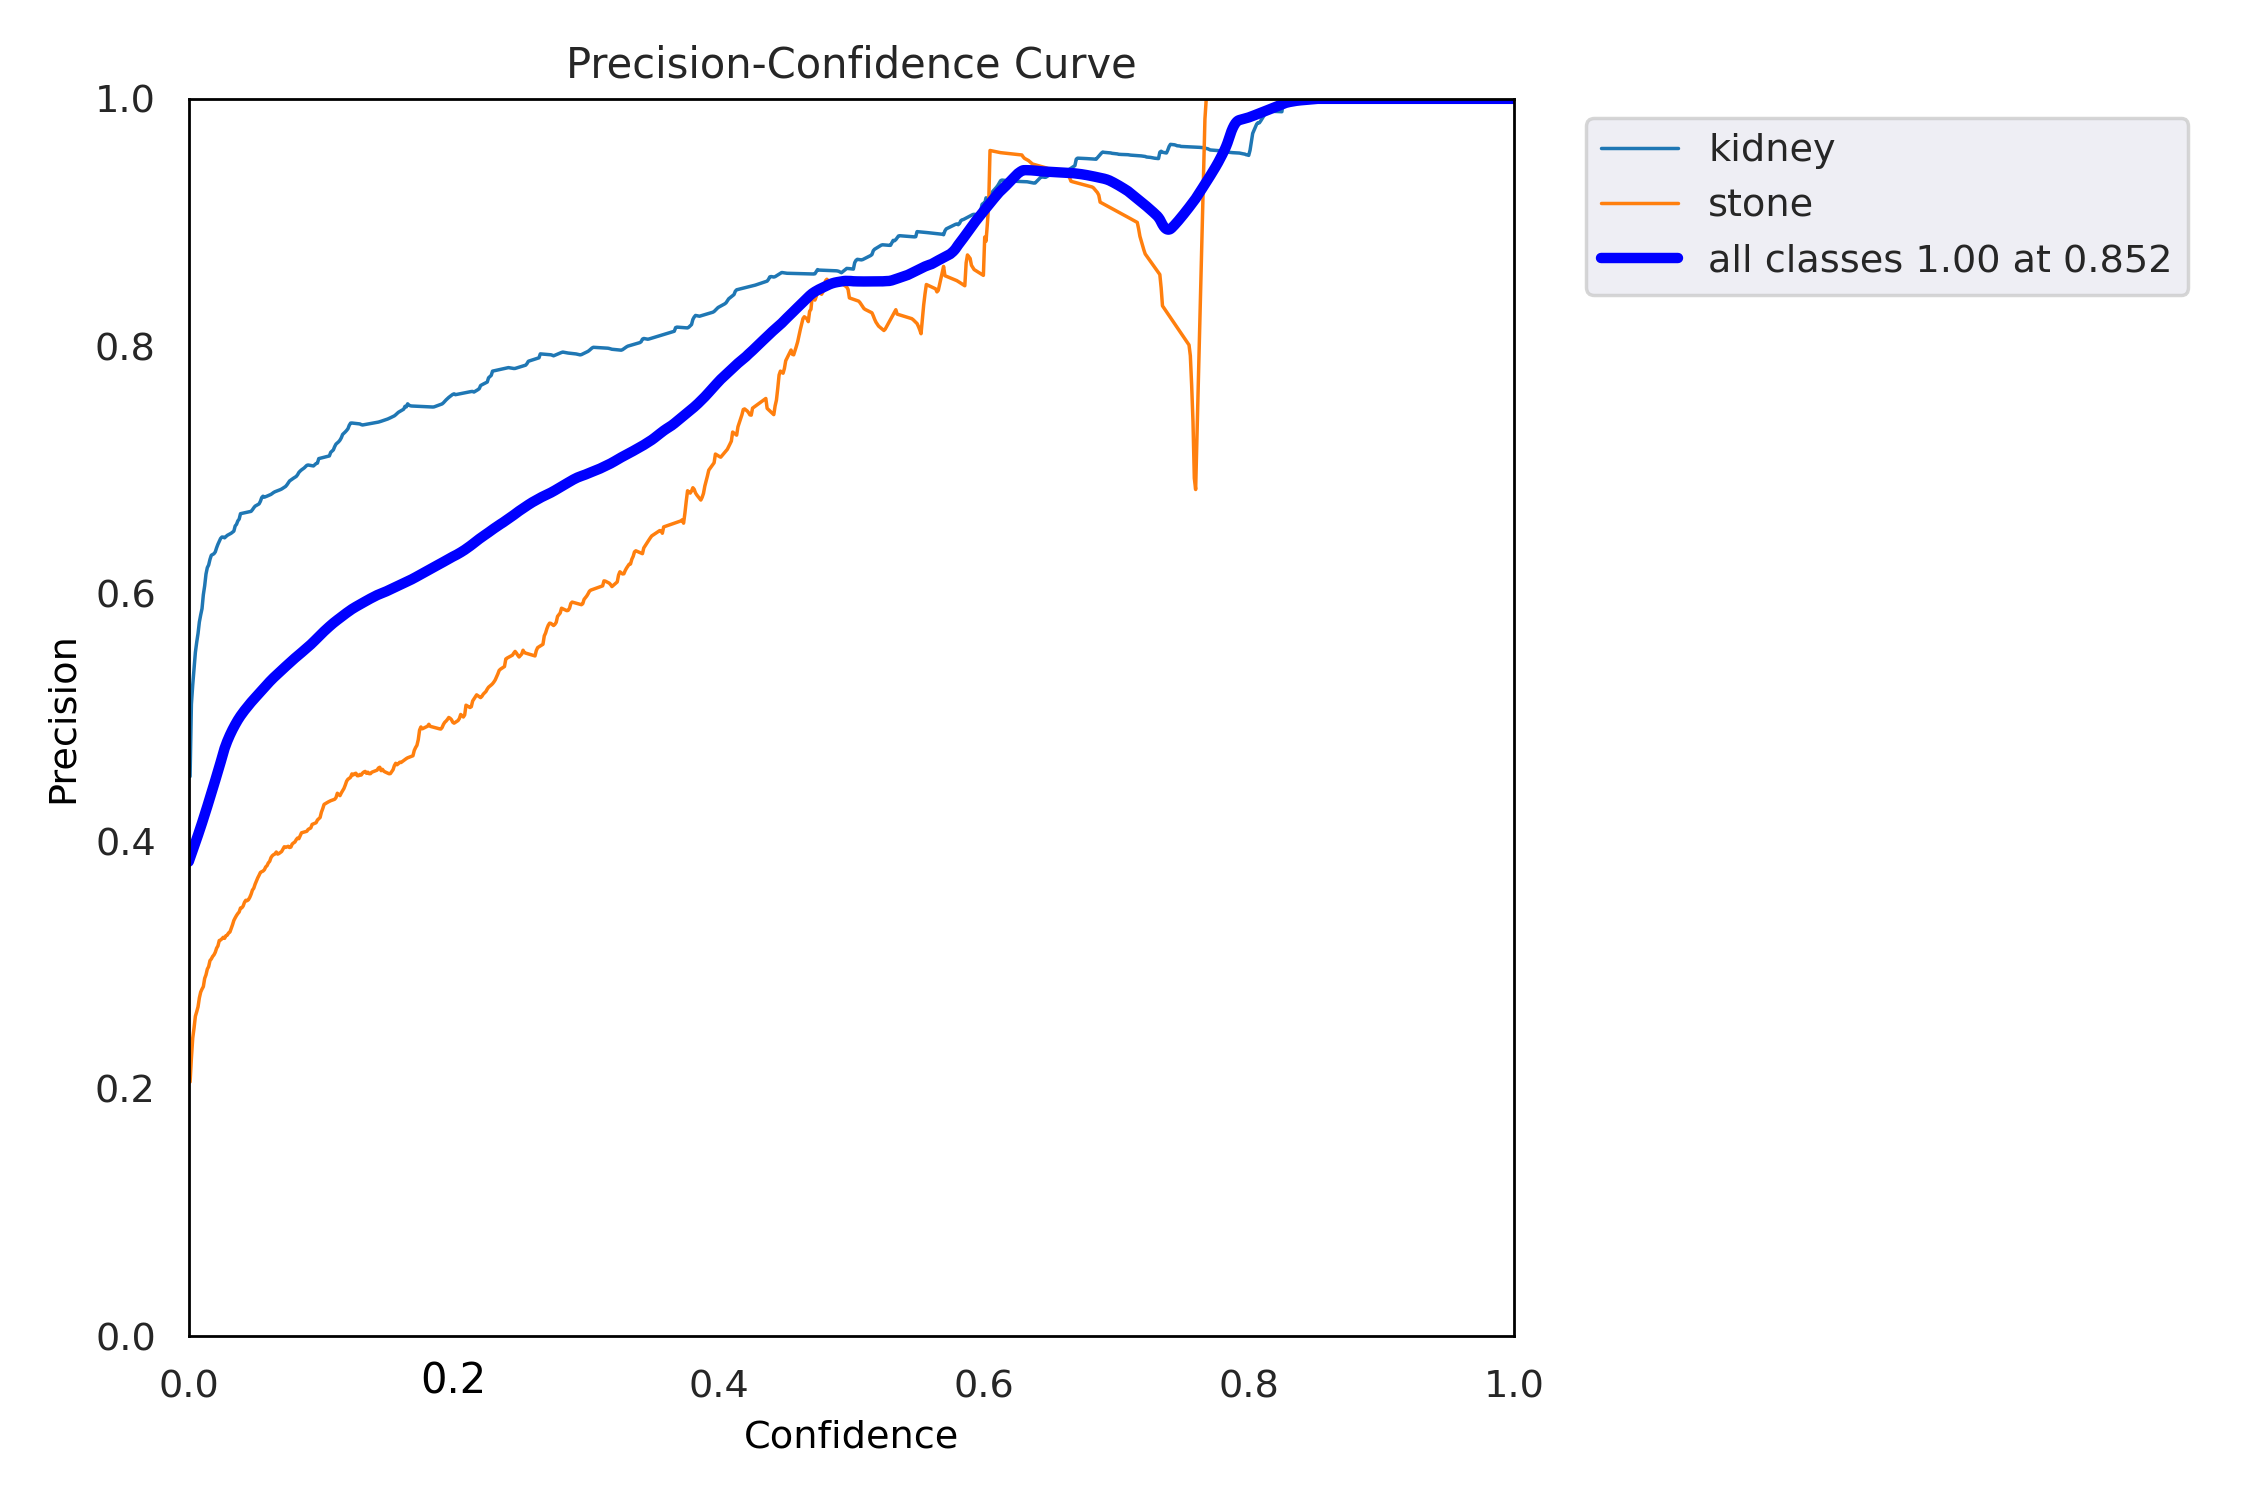

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/P_curve.png", width=1000)

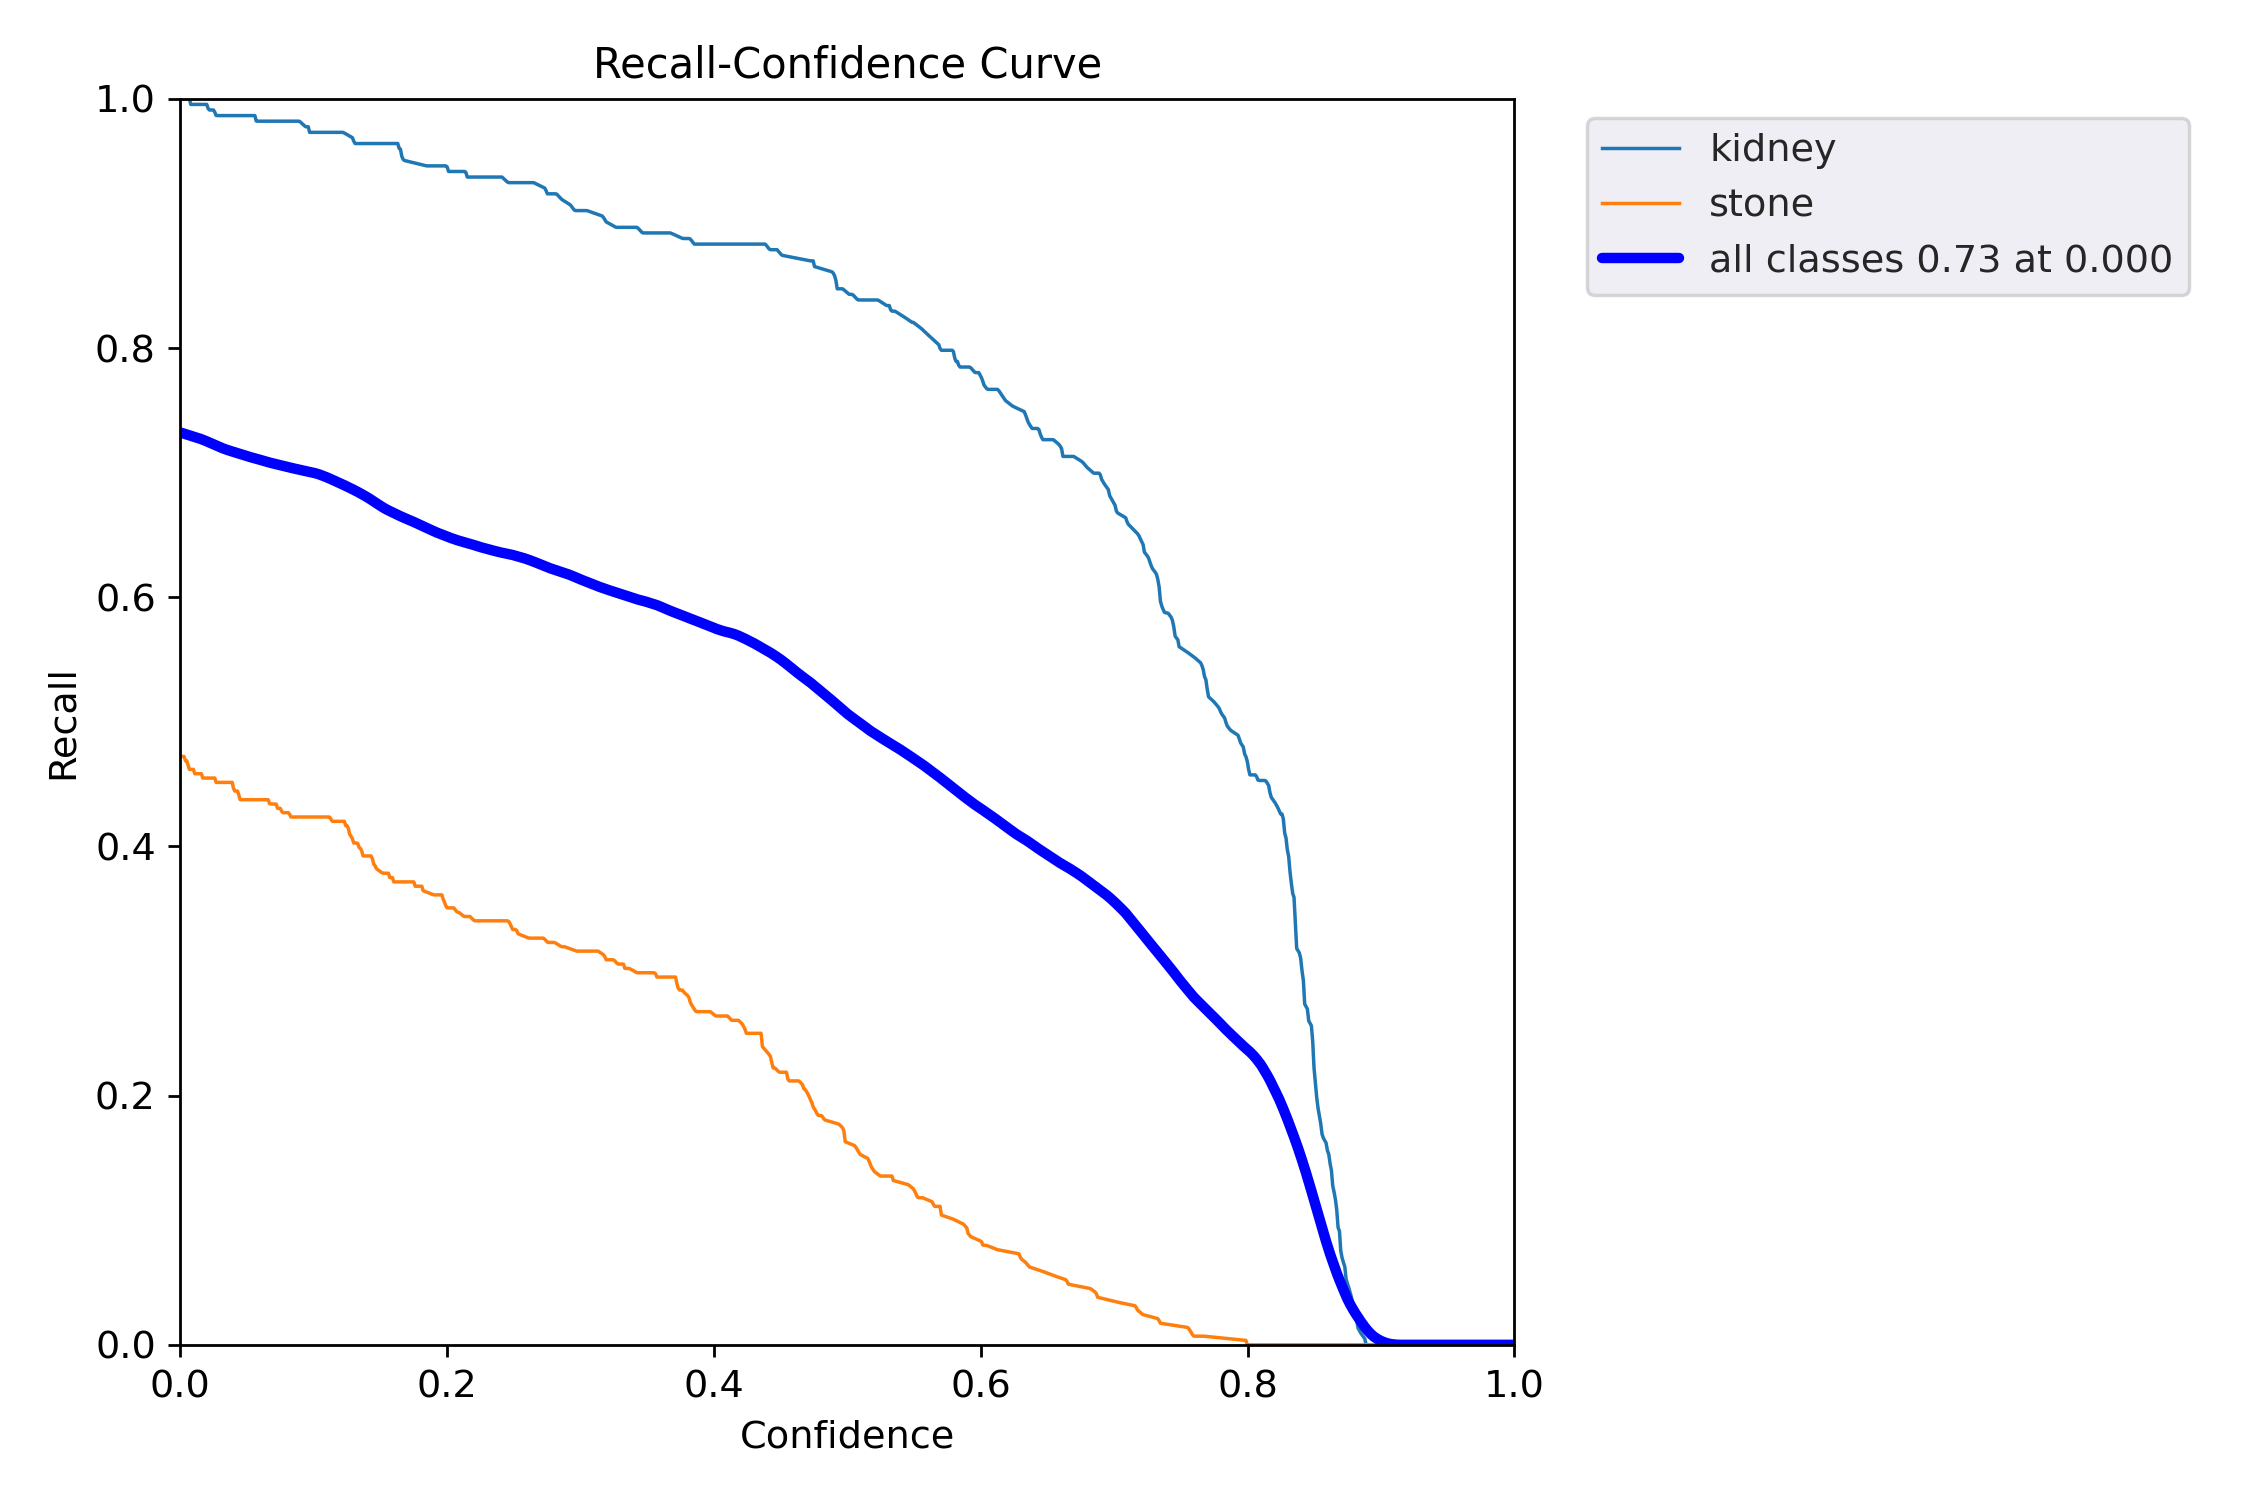

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/R_curve.png", width=1000)

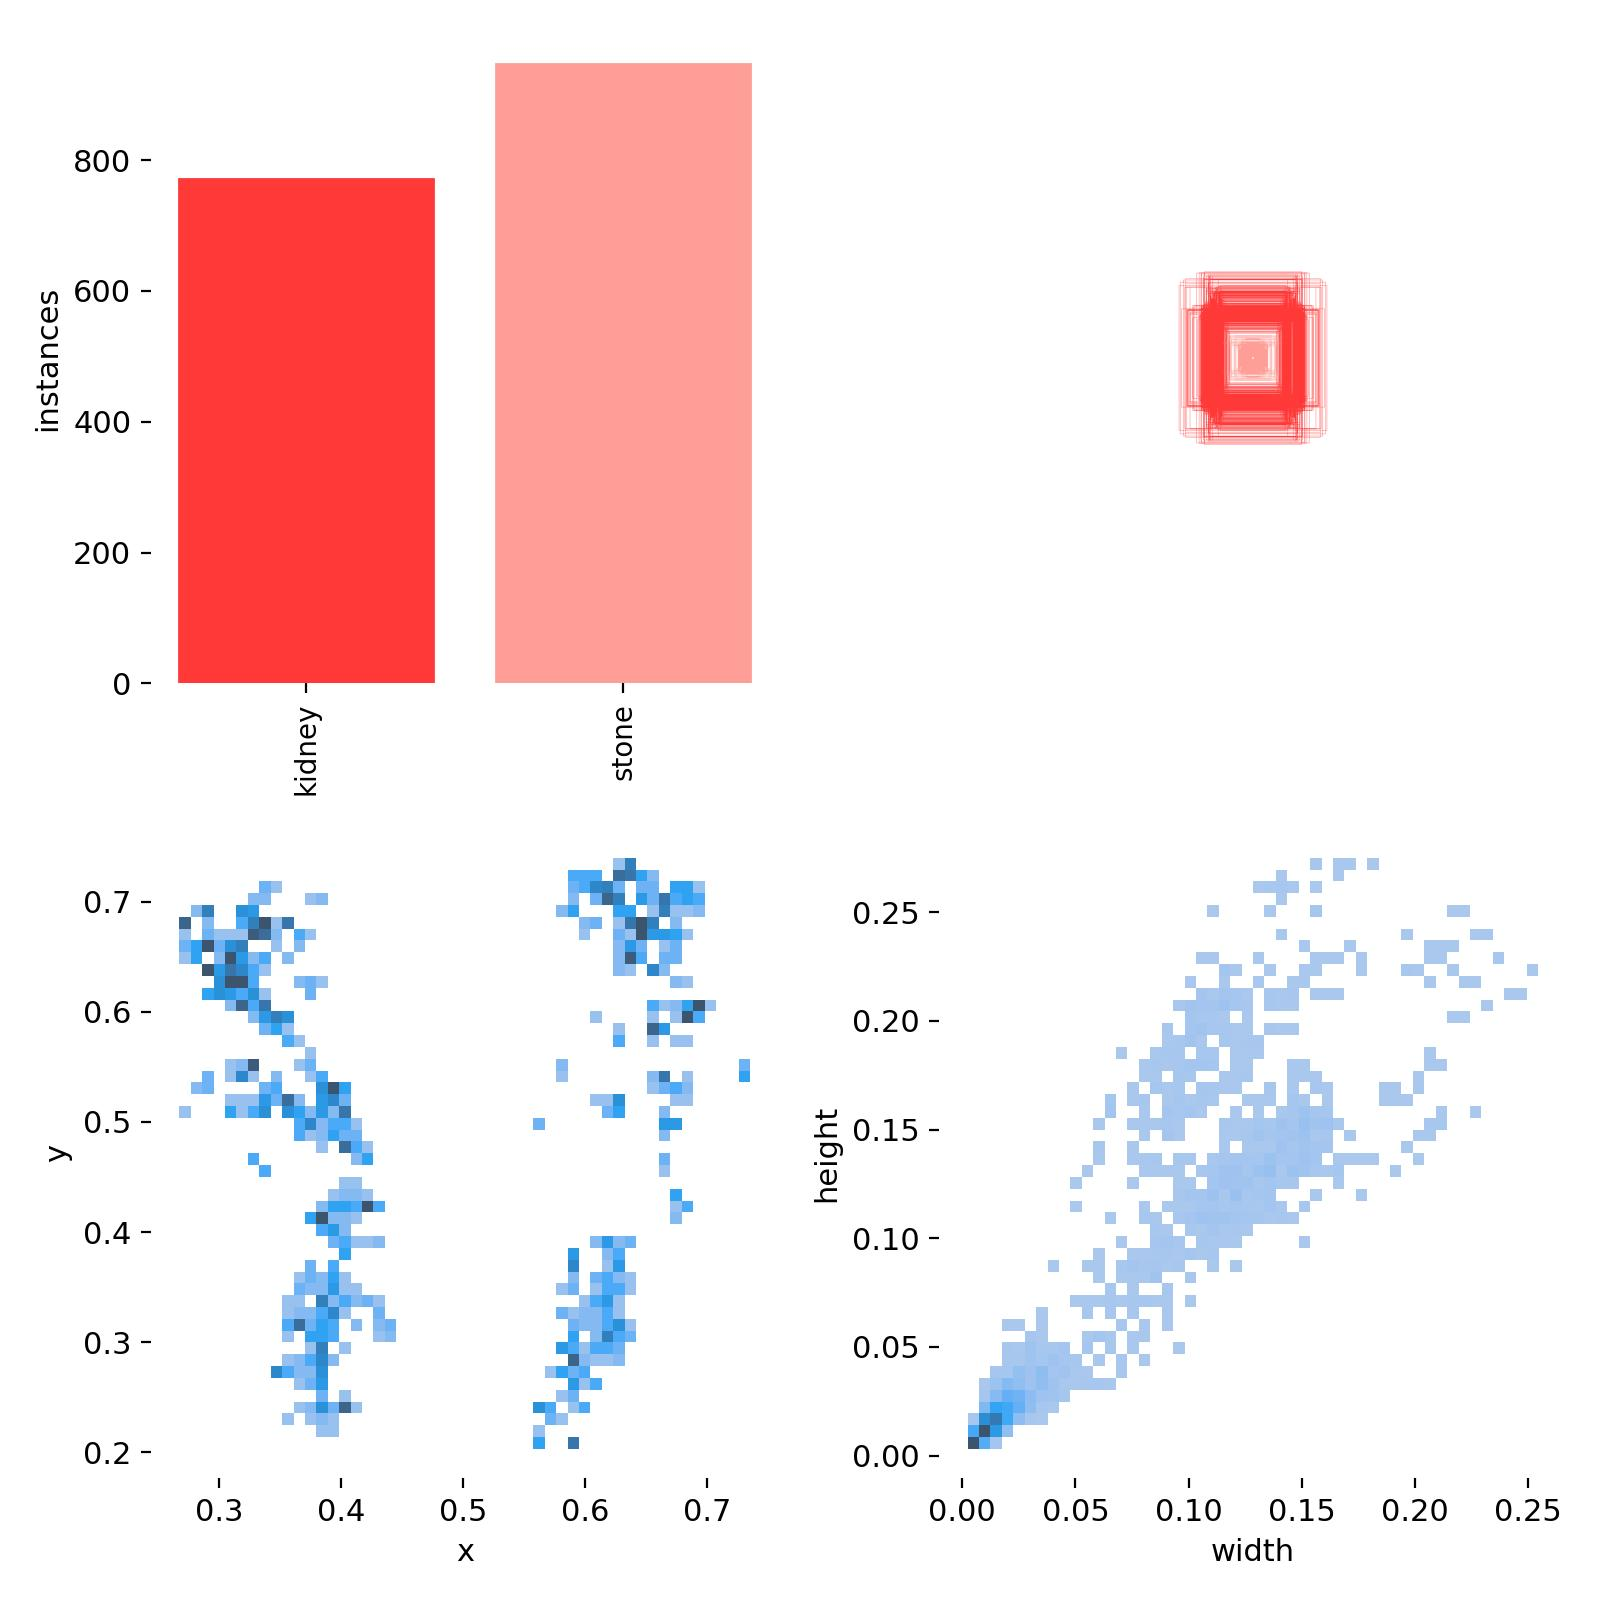

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/labels.jpg", width=1000)

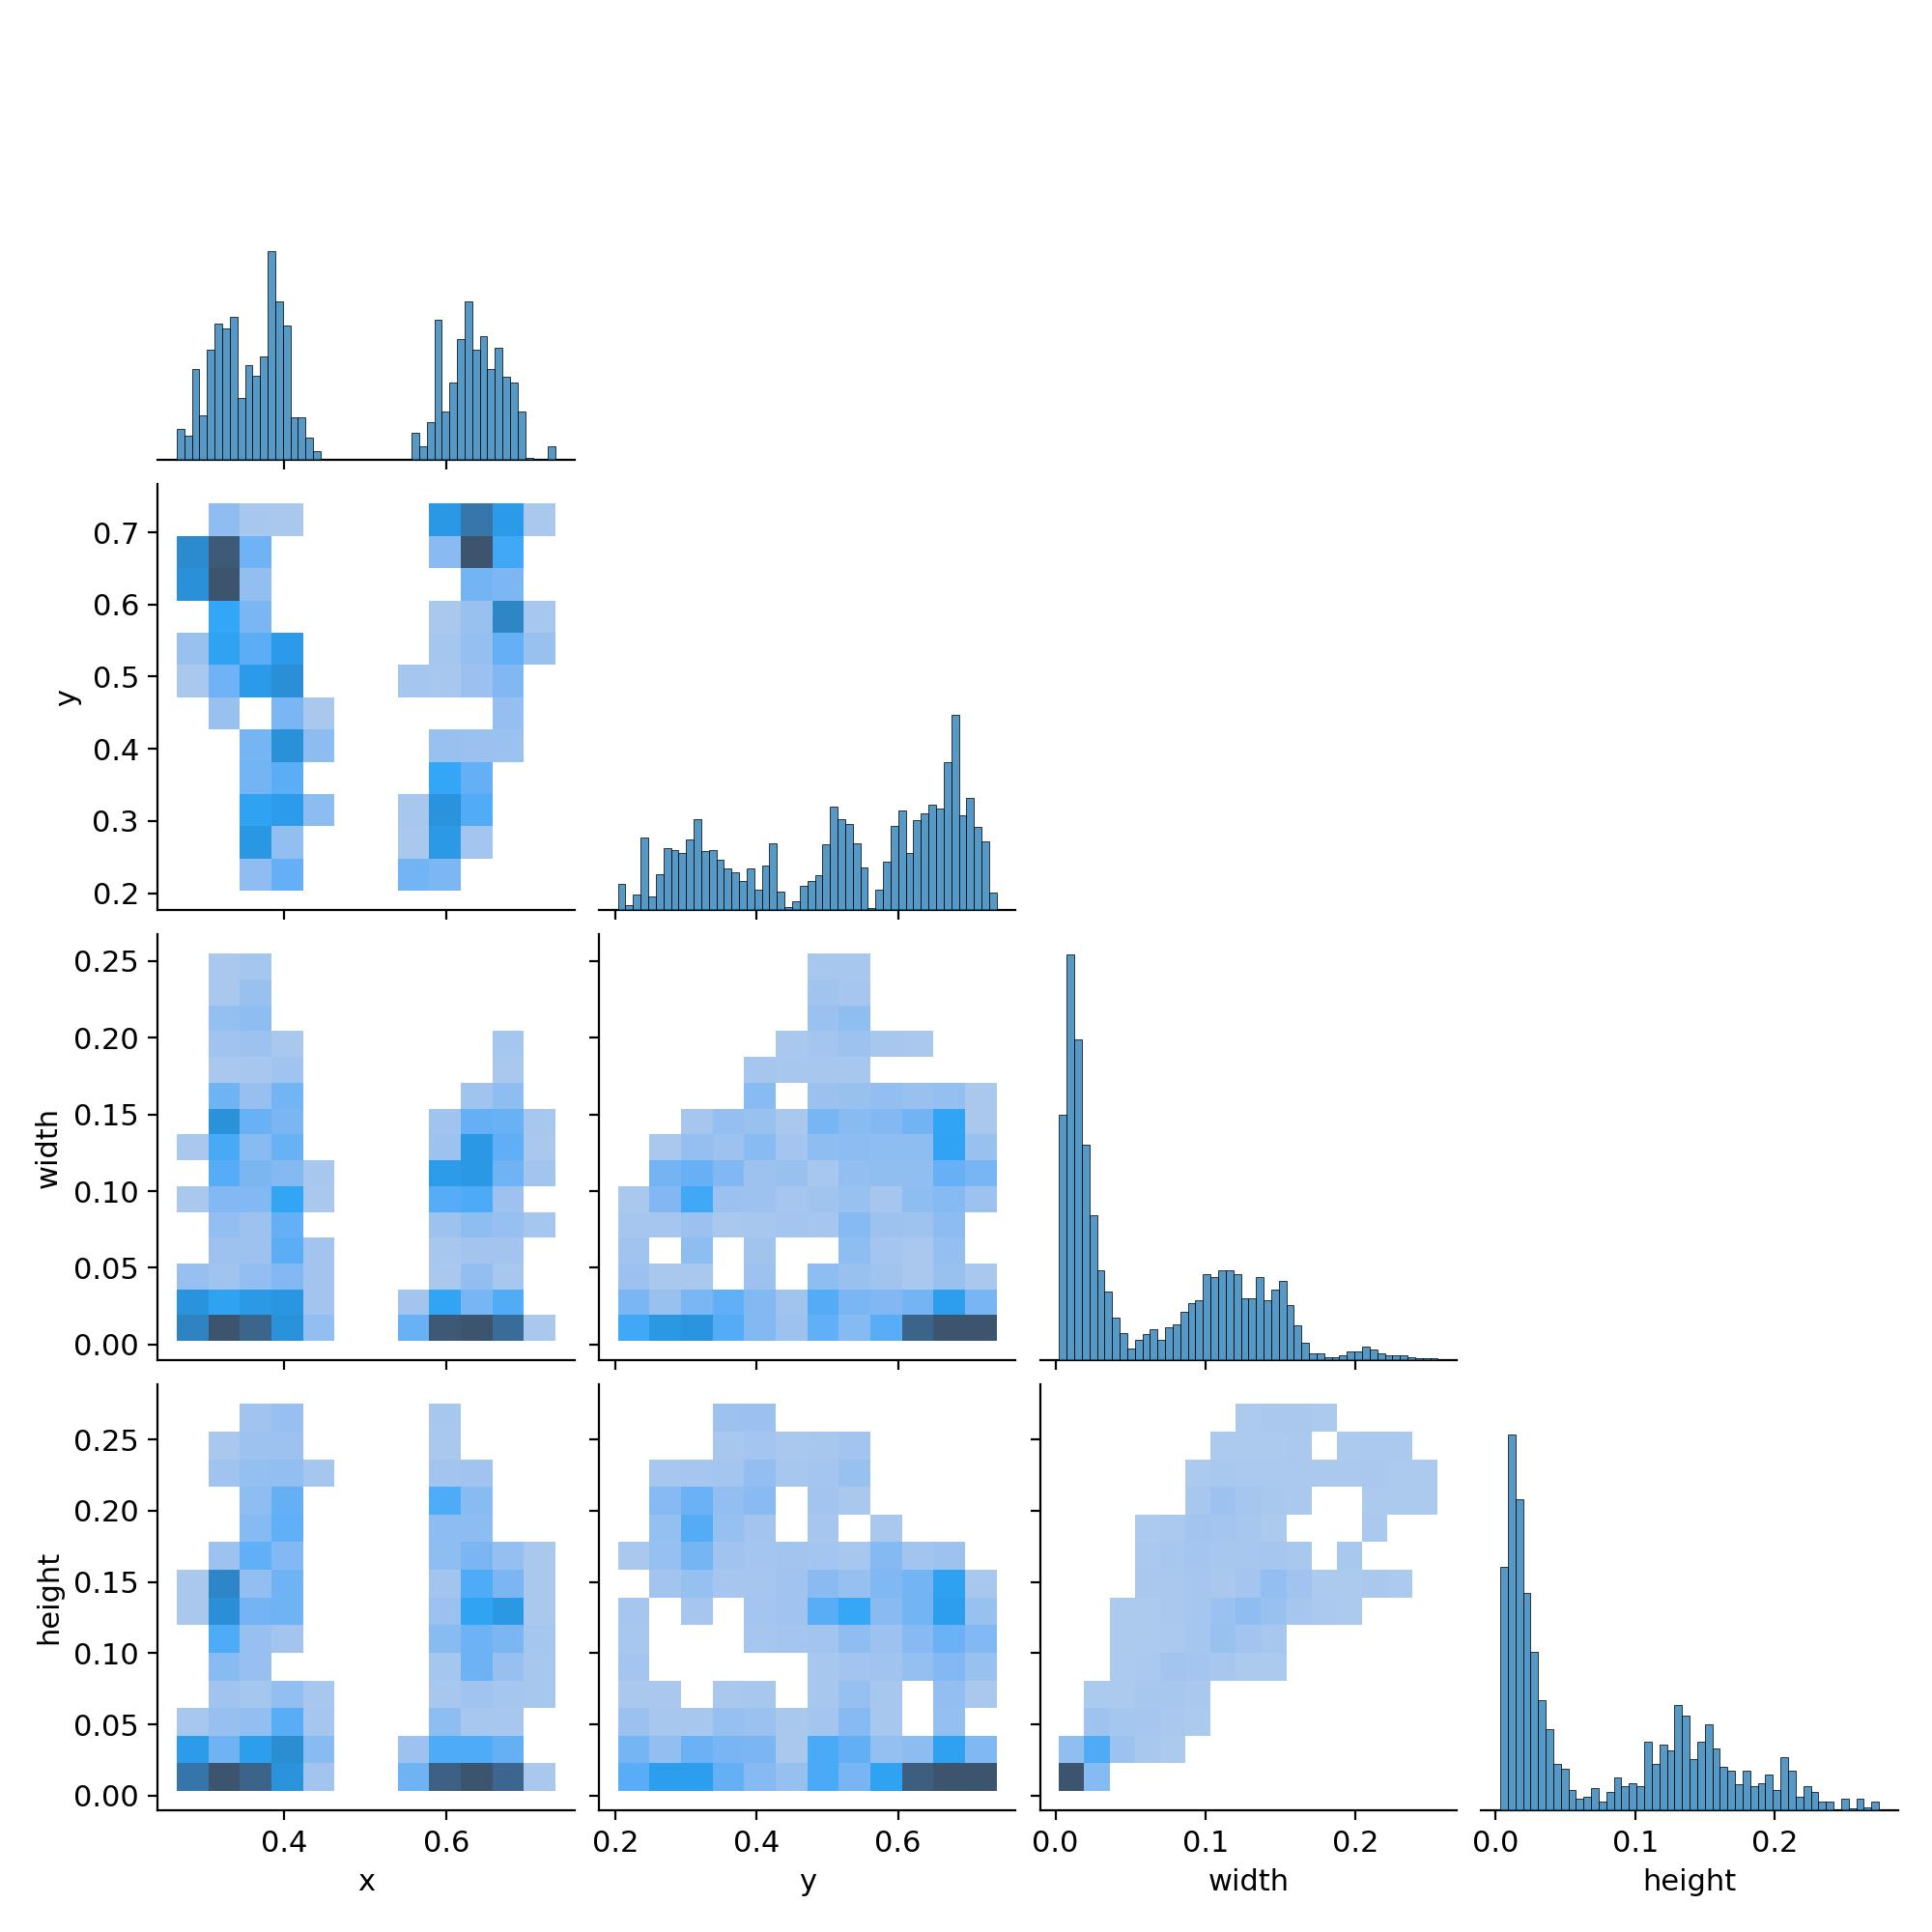

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/labels_correlogram.jpg", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/val_batch0_pred.jpg'

---------------------------------------

-------------------------------------------


## Validate Custom Model

In [ ]:
#%cd {HOME}/yolov9
%cd {HOME}

!python yolov9/val.py \
--img 117 --batch 64 --conf 0.001 --iou 0.7 --device cpu \
--data {HOME}/dataset/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/drive/MyDrive/YOLOV
val: data=/content/drive/MyDrive/YOLOV/dataset/data.yaml, weights=['/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/best.pt'], batch_size=64, imgsz=117, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov9/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 467 layers, 25412502 parameters, 0 gradients
WARNING ⚠️ --img-size 117 must be multiple of max stride 32, updating to 128
val: Scanning /content/drive/MyDrive/YOLOV/dataset/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50% 1/2 [00:02<00:02,  2.55s/it]Exception in thread Thread-2 (plot_images):
Traceback

In [ ]:
!python yolov9/detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/Stone.jpg --device cpu

detect: weights=['/content/drive/MyDrive/YOLOV/weights/yolov9-e.pt'], source=/content/drive/MyDrive/YOLOV/Stone.jpg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/YOLOV/Stone.jpg: 640x640 1 bird, 544.7ms
Speed: 2.0ms pre-process, 544.7ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect/exp4


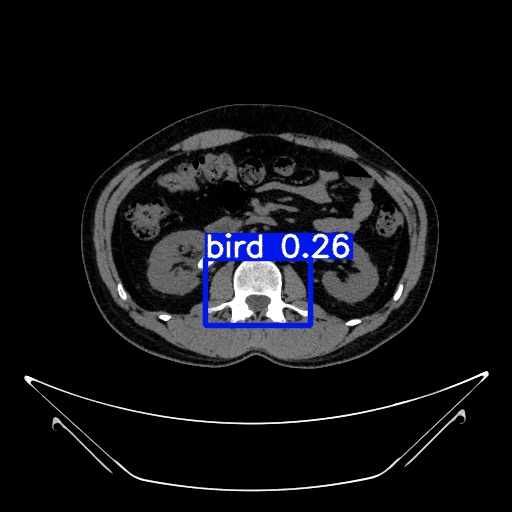

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp4/Stone.jpg", width=600)

## Inference with Custom Model

In [ ]:
!python yolov9/detect.py \
--img 60 --conf 0.25 --device cpu \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/dataset/test/images

detect: weights=['/content/drive/MyDrive/YOLOV/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/YOLOV/dataset/test/images, data=yolov9/data/coco128.yaml, imgsz=[60, 60], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 467 layers, 25412502 parameters, 0 gradients
WARNING ⚠️ --img-size [60, 60] must be multiple of max stride 32, updating to [64, 64]
image 1/60 /content/drive/MyDrive/YOLOV/dataset/test/images/Stone-103-_jpg.rf.d9b79d7216cda83c35d74d00afd3df5c.jpg: 64x64 1 kidney, 86.0ms
image 2/60 /content/drive/MyDrive/YOLOV/dataset/test/images/Stone-134-_jpg.rf.978a32e057

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

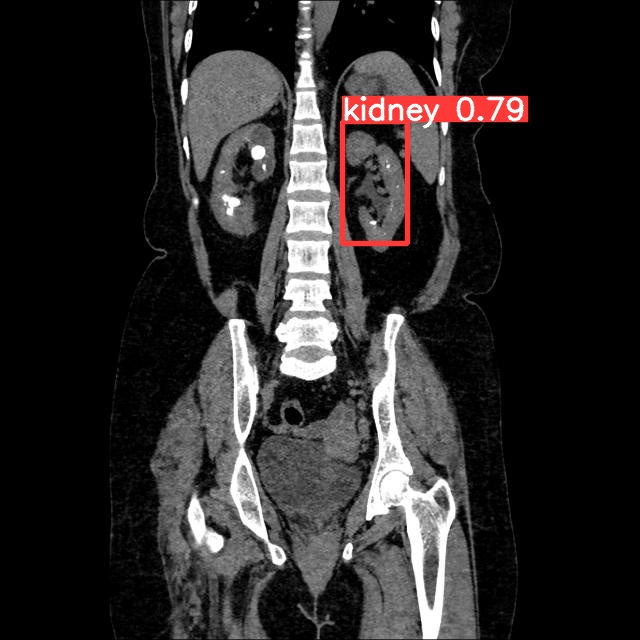

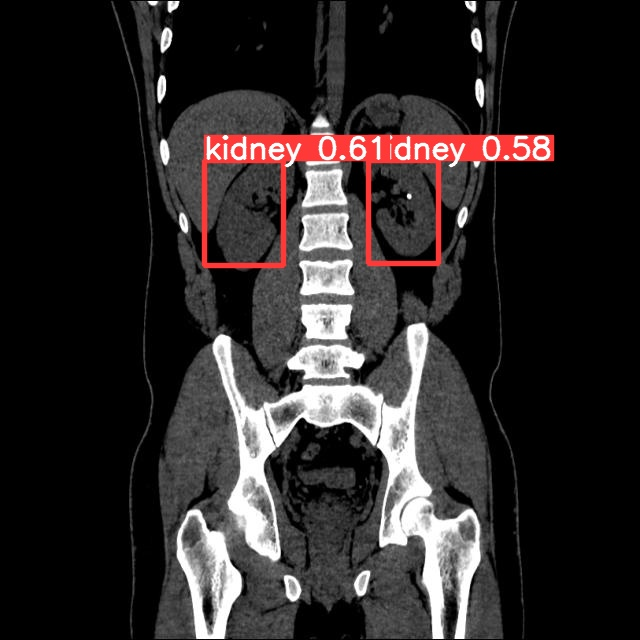

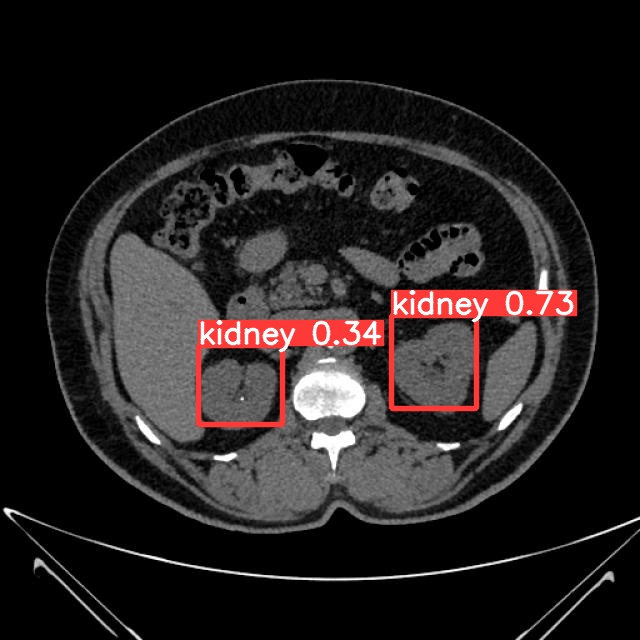

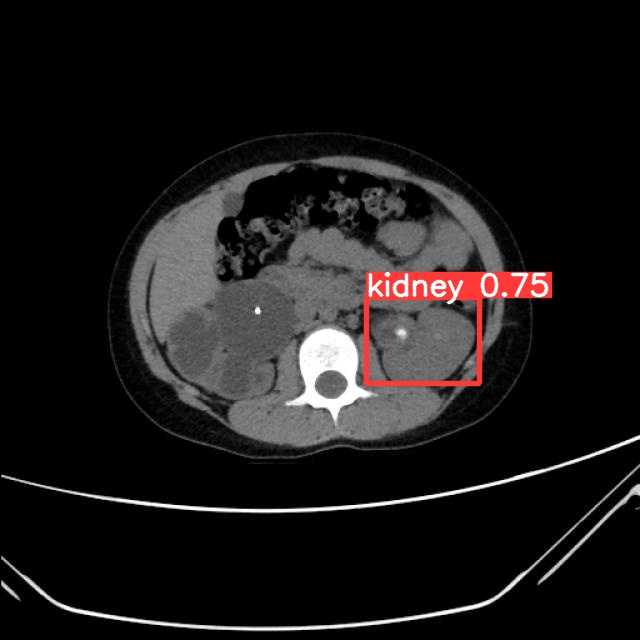

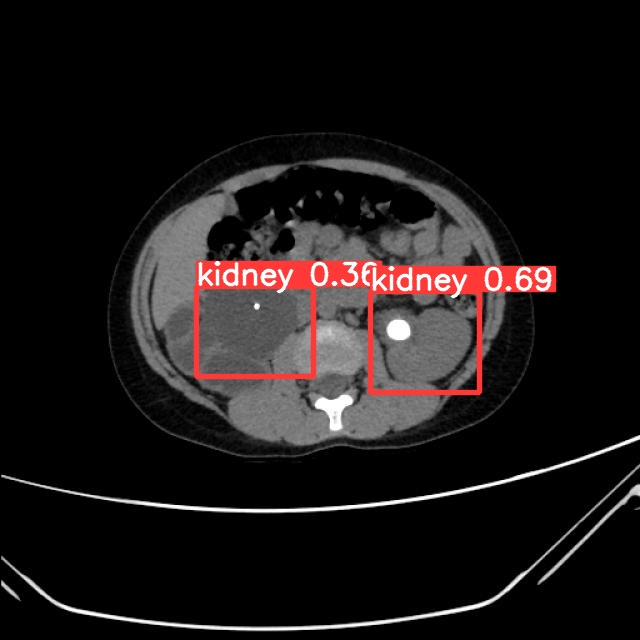

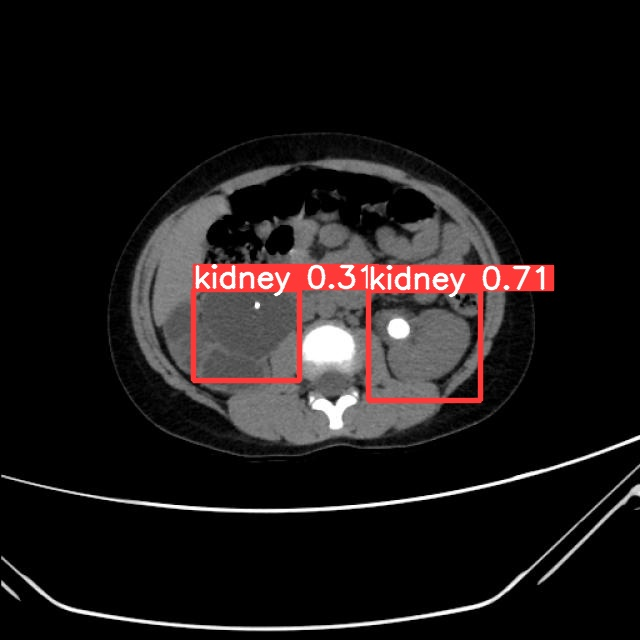

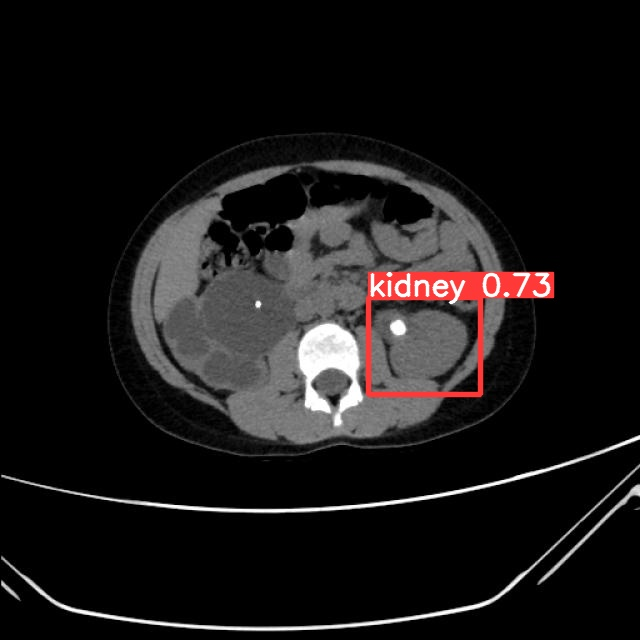

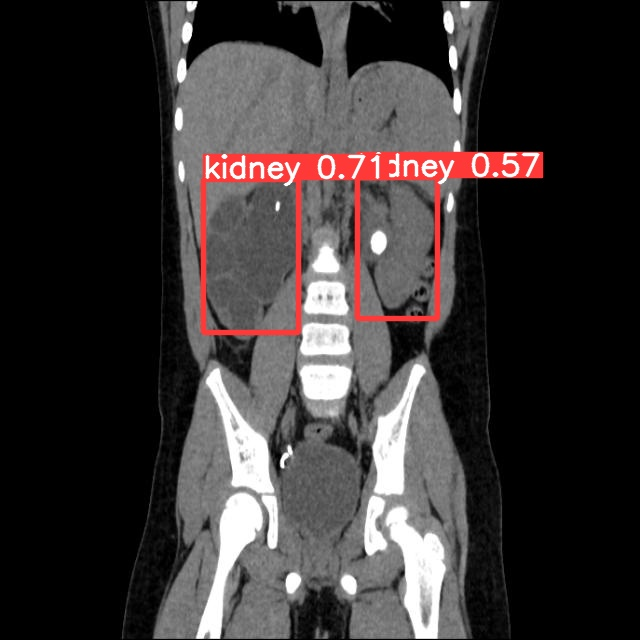

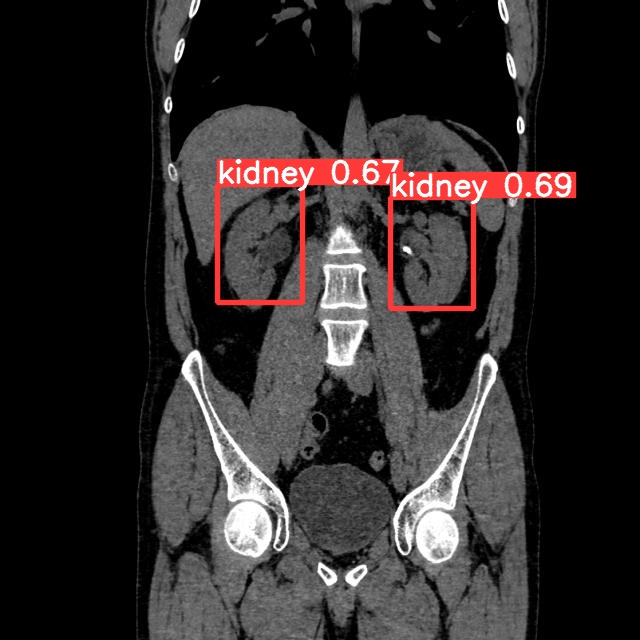

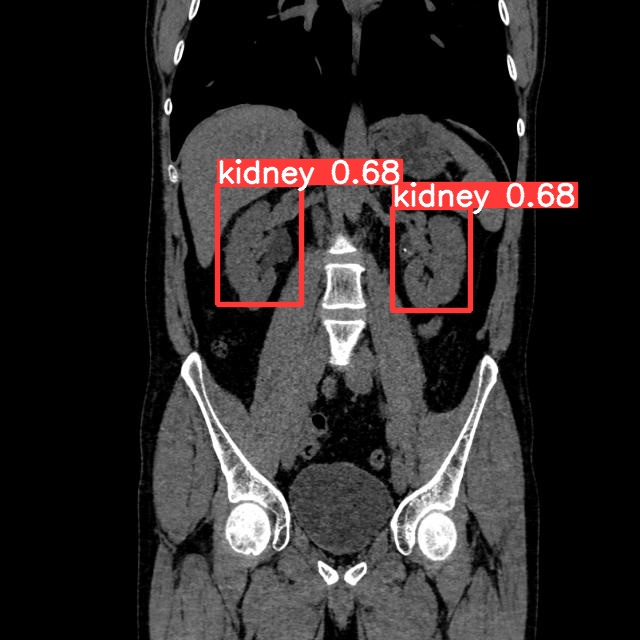

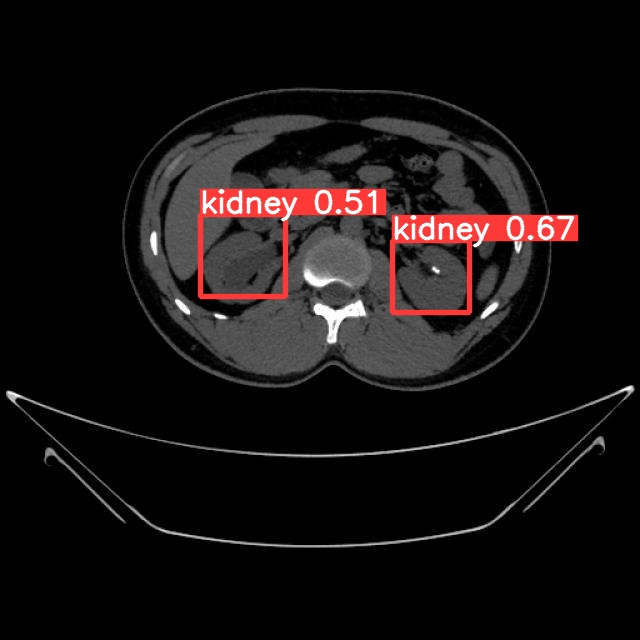

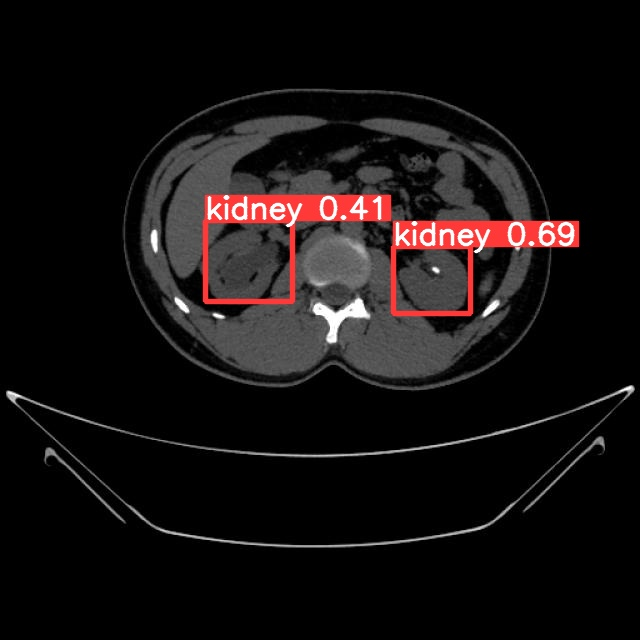

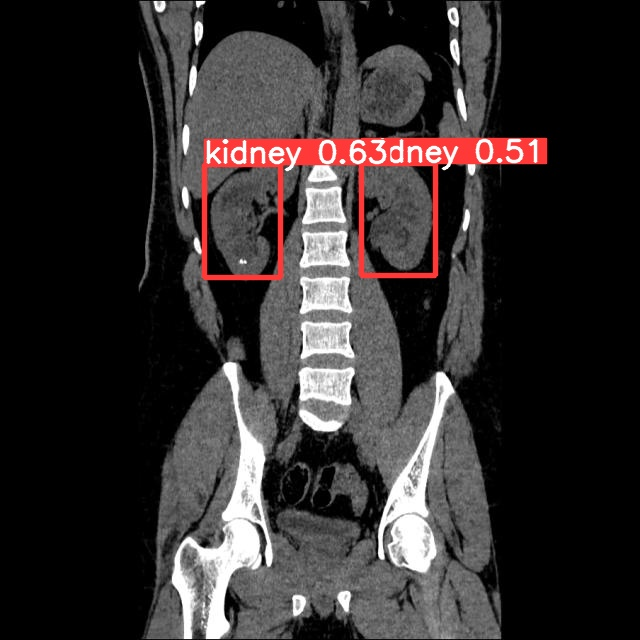

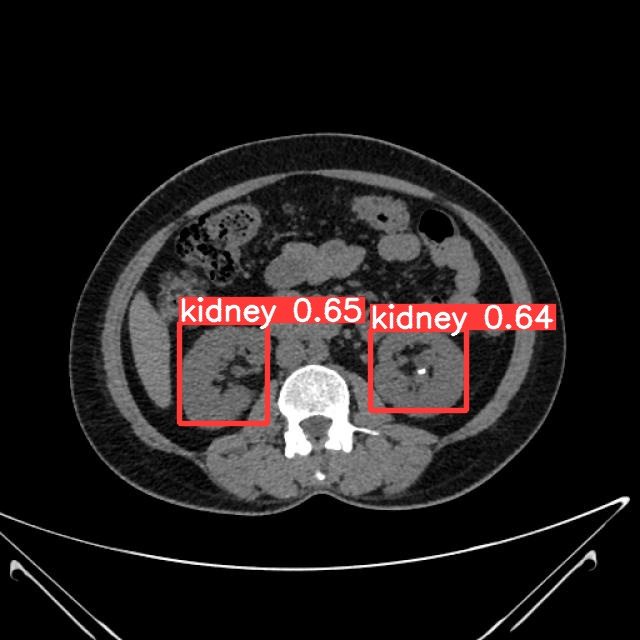

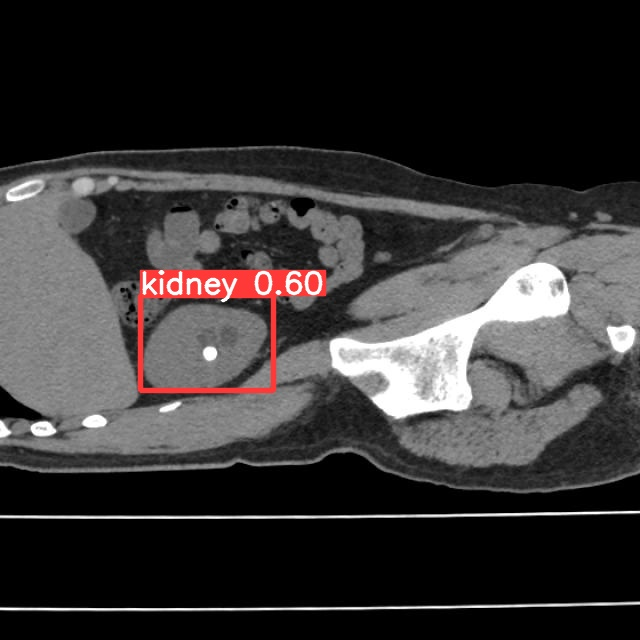

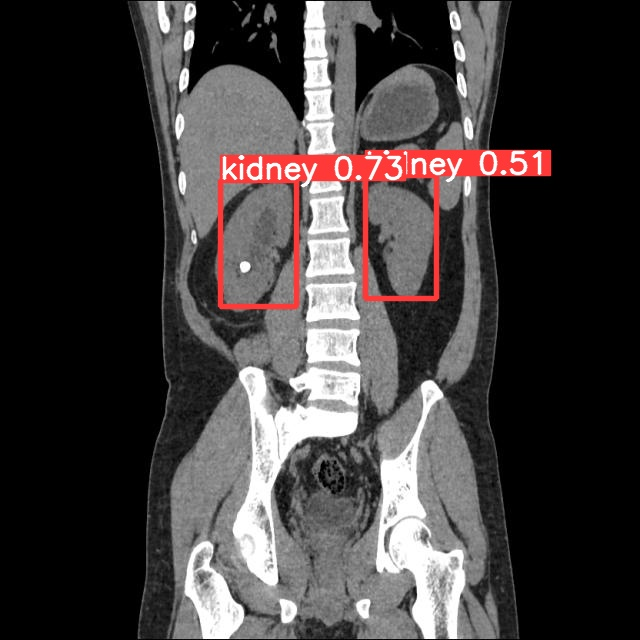

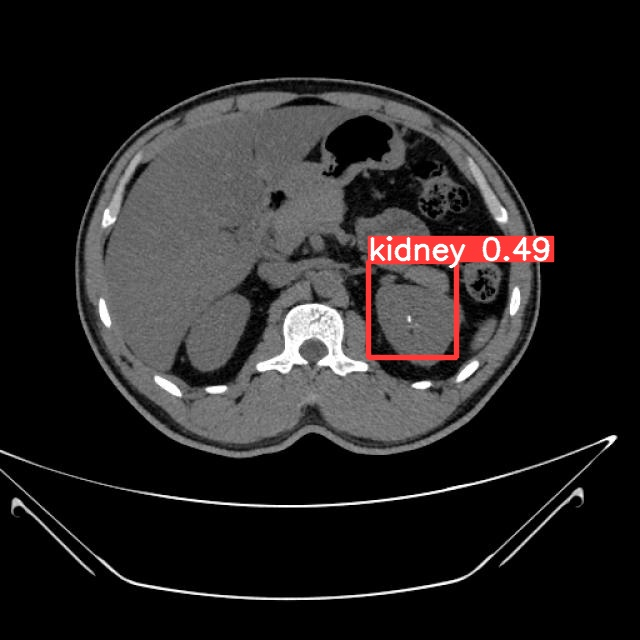

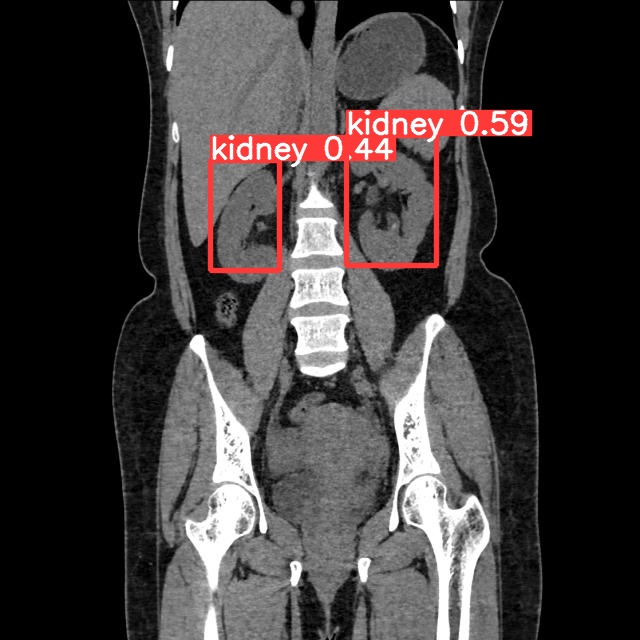

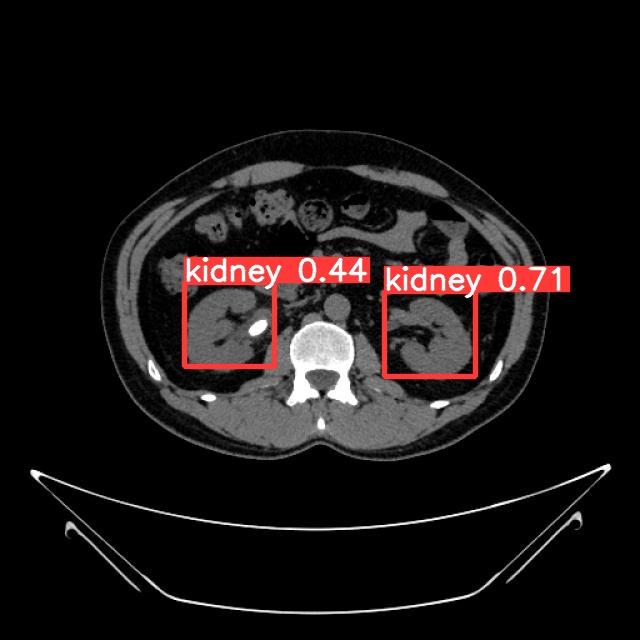

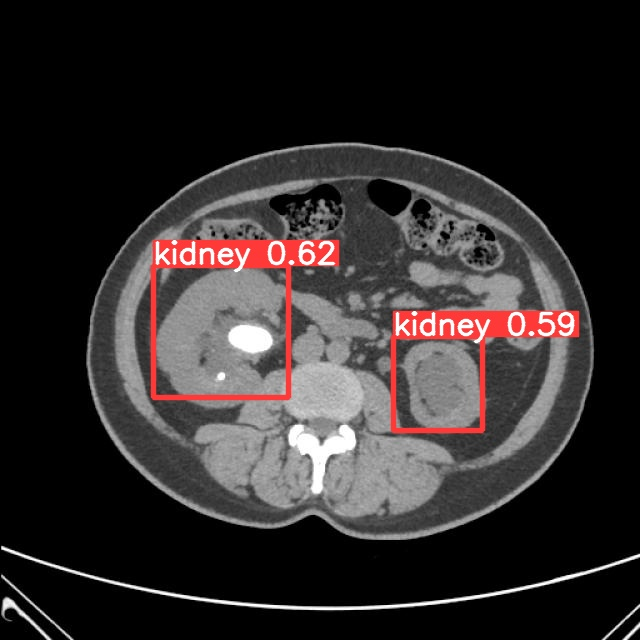

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp5/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))